In [2]:
!pip3 install cartopy
!pip3 install mlxtend
!pip3 install umap
!pip3 install umap-learn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


# Import libraries

In [3]:
# Main imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as msno
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift
import plotly.express as px
import datetime

# Important: Association Rules
import ast
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# For ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

# For Geo maps
import geopandas as gpd
from shapely.geometry import Point
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from utils import *
import umap.umap_ as umap

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/yellowbrick/style/colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/setuptools/_distutils/version.py:336: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/yellowbrick/style/rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/setuptools/_distutils/version.py:336: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(othe

In [4]:
pd.set_option('display.max_rows', 30)

# Import Data

In [5]:
customer_df=pd.read_csv("customer_info.csv")

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34060 entries, 0 to 34059
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               34060 non-null  int64  
 1   customer_id                              34060 non-null  int64  
 2   customer_name                            34060 non-null  object 
 3   customer_gender                          34060 non-null  object 
 4   customer_birthdate                       33719 non-null  object 
 5   kids_home                                33311 non-null  float64
 6   teens_home                               33277 non-null  float64
 7   number_complaints                        33038 non-null  float64
 8   distinct_stores_visited                  33379 non-null  float64
 9   lifetime_spend_groceries                 34060 non-null  float64
 10  lifetime_spend_electronics               34060

In [7]:
customer_df.head()

Unnamed: 0  customer_id      customer_name customer_gender  \
0           0        29930        April Clark          female   
1           1         6813  Bsc. Paul Ketchum            male   
2           2        39451       Mary Downing          female   
3           3        21557       Manuel Kueny            male   
4           4        16415  Phd. Curtis Tharp            male   

    customer_birthdate  kids_home  teens_home  number_complaints  \
0  01/15/1972 02:27 PM        2.0         2.0                1.0   
1  07/31/1944 10:53 AM        0.0         1.0                0.0   
2  11/13/1989 02:11 PM        2.0         3.0                0.0   
3  08/09/1976 06:23 AM        0.0         0.0                1.0   
4  07/11/1966 08:12 AM        1.0         1.0                1.0   

   distinct_stores_visited  lifetime_spend_groceries  ...  \
0                      4.0                    7789.0  ...   
1                      4.0                    8653.0  ...   
2                      7.0                   15605.0  ...   
3                      1.0                   13440.0  ...   
4                      5.0                   49250.0  ...   

   lifetime_spend_fish  lifetime_spend_hygiene  lifetime_spend_videogames  \
0               1894.0                   457.0                      412.0   
1                346.0                   394.0                       75.0   
2               1971.0                   920.0                      335.0   
3                785.0                   139.0                      679.0   
4               1492.0                  1046.0                      112.0   

   lifetime_spend_petfood  lifetime_total_distinct_products  \
0                   428.0                             386.0   
1                   226.0                              73.0   
2                   192.0                             319.0   
3                   270.0                             221.0   
4                   144.0                             244.0   

   percentage_of_products_bought_promotion  year_first_transaction  \
0                                 0.158741                  2018.0   
1                                 1.227890                  2013.0   
2                                 0.101598                  2011.0   
3                                 0.259943                  2009.0   
4                                 0.317822                  2012.0   

   loyalty_card_number   latitude  longitude  
0                  NaN  38.721807  -9.125534  
1             971840.0  38.734668  -9.163533  
2                  NaN  38.787126  -9.147077  
3                  NaN  38.741816  -9.159700  
4             925367.0  38.785921  -9.149221  

[5 rows x 26 columns]

# EDA

In [8]:
data=customer_df.copy()
print(data)

       Unnamed: 0  customer_id      customer_name customer_gender  \
0               0        29930        April Clark          female   
1               1         6813  Bsc. Paul Ketchum            male   
2               2        39451       Mary Downing          female   
3               3        21557       Manuel Kueny            male   
4               4        16415  Phd. Curtis Tharp            male   
...           ...          ...                ...             ...   
34055       34055        37071          Mary Diaz          female   
34056       34056        27422         John Gross            male   
34057       34057        39540    Kathleen Harper          female   
34058       34058        18367  Msc. Jenny Landry          female   
34059       34059        22050        Roy Wilkins            male   

        customer_birthdate  kids_home  teens_home  number_complaints  \
0      01/15/1972 02:27 PM        2.0         2.0                1.0   
1      07/31/1944 10:53 AM 

In [9]:
data.drop(columns=["Unnamed: 0","customer_name"],inplace=True)

In [10]:
data["customer_gender"]=data["customer_gender"].apply(lambda x: 1 if x == "male" else 0)

In [11]:
data.head()

customer_id  customer_gender   customer_birthdate  kids_home  teens_home  \
0        29930                0  01/15/1972 02:27 PM        2.0         2.0   
1         6813                1  07/31/1944 10:53 AM        0.0         1.0   
2        39451                0  11/13/1989 02:11 PM        2.0         3.0   
3        21557                1  08/09/1976 06:23 AM        0.0         0.0   
4        16415                1  07/11/1966 08:12 AM        1.0         1.0   

   number_complaints  distinct_stores_visited  lifetime_spend_groceries  \
0                1.0                      4.0                    7789.0   
1                0.0                      4.0                    8653.0   
2                0.0                      7.0                   15605.0   
3                1.0                      1.0                   13440.0   
4                1.0                      5.0                   49250.0   

   lifetime_spend_electronics  typical_hour  ...  lifetime_spend_fish  \
0                      5601.0          13.0  ...               1894.0   
1                        35.0          14.0  ...                346.0   
2                      4275.0          14.0  ...               1971.0   
3                     16366.0          14.0  ...                785.0   
4                      3197.0          14.0  ...               1492.0   

   lifetime_spend_hygiene  lifetime_spend_videogames  lifetime_spend_petfood  \
0                   457.0                      412.0                   428.0   
1                   394.0                       75.0                   226.0   
2                   920.0                      335.0                   192.0   
3                   139.0                      679.0                   270.0   
4                  1046.0                      112.0                   144.0   

   lifetime_total_distinct_products  percentage_of_products_bought_promotion  \
0                             386.0                                 0.158741   
1                              73.0                                 1.227890   
2                             319.0                                 0.101598   
3                             221.0                                 0.259943   
4                             244.0                                 0.317822   

   year_first_transaction  loyalty_card_number   latitude  longitude  
0                  2018.0                  NaN  38.721807  -9.125534  
1                  2013.0             971840.0  38.734668  -9.163533  
2                  2011.0                  NaN  38.787126  -9.147077  
3                  2009.0                  NaN  38.741816  -9.159700  
4                  2012.0             925367.0  38.785921  -9.149221  

[5 rows x 24 columns]

### Featuring age

In [12]:
data["customer_birthdate"]=pd.to_datetime(data["customer_birthdate"])
today=datetime.today()
data["age"]=today.year-data["customer_birthdate"].dt.year

/var/folders/f2/5_t719y12k71w48gv5m_mm2c0000gn/T/ipykernel_2714/978871099.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["customer_birthdate"]=pd.to_datetime(data["customer_birthdate"])


In [13]:
data.drop(columns=["customer_birthdate"], inplace=True)

In [14]:
data.head()

customer_id  customer_gender  kids_home  teens_home  number_complaints  \
0        29930                0        2.0         2.0                1.0   
1         6813                1        0.0         1.0                0.0   
2        39451                0        2.0         3.0                0.0   
3        21557                1        0.0         0.0                1.0   
4        16415                1        1.0         1.0                1.0   

   distinct_stores_visited  lifetime_spend_groceries  \
0                      4.0                    7789.0   
1                      4.0                    8653.0   
2                      7.0                   15605.0   
3                      1.0                   13440.0   
4                      5.0                   49250.0   

   lifetime_spend_electronics  typical_hour  lifetime_spend_vegetables  ...  \
0                      5601.0          13.0                      726.0  ...   
1                        35.0          14.0                      792.0  ...   
2                      4275.0          14.0                     1585.0  ...   
3                     16366.0          14.0                       28.0  ...   
4                      3197.0          14.0                      258.0  ...   

   lifetime_spend_hygiene  lifetime_spend_videogames  lifetime_spend_petfood  \
0                   457.0                      412.0                   428.0   
1                   394.0                       75.0                   226.0   
2                   920.0                      335.0                   192.0   
3                   139.0                      679.0                   270.0   
4                  1046.0                      112.0                   144.0   

   lifetime_total_distinct_products  percentage_of_products_bought_promotion  \
0                             386.0                                 0.158741   
1                              73.0                                 1.227890   
2                             319.0                                 0.101598   
3                             221.0                                 0.259943   
4                             244.0                                 0.317822   

   year_first_transaction  loyalty_card_number   latitude  longitude   age  
0                  2018.0                  NaN  38.721807  -9.125534  53.0  
1                  2013.0             971840.0  38.734668  -9.163533  81.0  
2                  2011.0                  NaN  38.787126  -9.147077  36.0  
3                  2009.0                  NaN  38.741816  -9.159700  49.0  
4                  2012.0             925367.0  38.785921  -9.149221  59.0  

[5 rows x 24 columns]

### Cohort Anaalysis

In [15]:
data_cohort = data.copy()

In [16]:
data_cohort['cohort_year'] = data_cohort['year_first_transaction']

In [17]:
# Cohort sizes
cohort_sizes = data_cohort.groupby('cohort_year')['customer_id'].nunique().reset_index()
cohort_sizes.columns = ['cohort_year', 'num_customers']

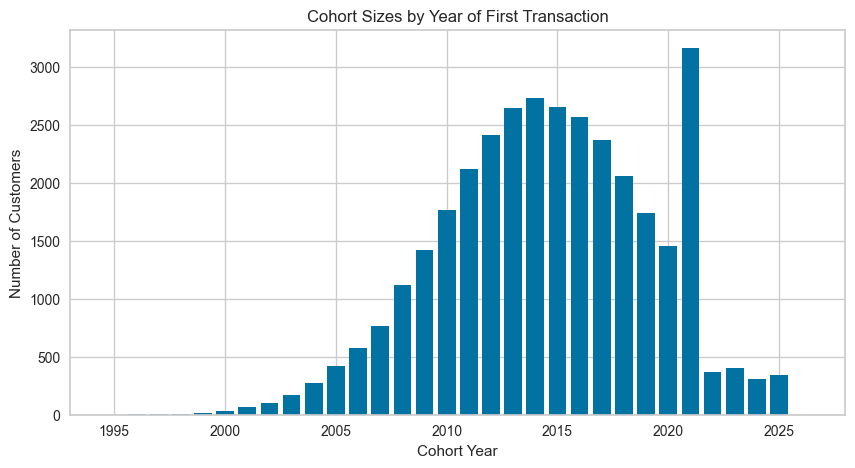

In [18]:
plt.figure(figsize=(10,5))
plt.bar(cohort_sizes['cohort_year'], cohort_sizes['num_customers'])
plt.title('Cohort Sizes by Year of First Transaction')
plt.xlabel('Cohort Year')
plt.ylabel('Number of Customers')
plt.show()

### Converting loyalty_card_number to if customer has a card

In [19]:
print(data["loyalty_card_number"].isnull().sum()/len(data["loyalty_card_number"]))

0.32025836758661186


In [20]:
data["loyalty_card_have"]=np.where(data["loyalty_card_number"].isnull(), 0, 1)
data["loyalty_card_have"]

0        0
1        1
2        0
3        0
4        1
        ..
34055    0
34056    1
34057    0
34058    1
34059    0
Name: loyalty_card_have, Length: 34060, dtype: int64

In [21]:
data.drop(columns=["loyalty_card_number"],inplace=True)

### Creating feauture customer_relationship_year

In [22]:
data["customer_relationship_year"]=today.year-data["year_first_transaction"]
data.drop(columns=["year_first_transaction"], inplace=True)
data["customer_relationship_year"]

0         7.0
1        12.0
2        14.0
3        16.0
4        13.0
         ... 
34055     7.0
34056     6.0
34057     7.0
34058    10.0
34059     9.0
Name: customer_relationship_year, Length: 34060, dtype: float64

### Featuring longtitude and latitude

In [23]:
data["geometry"] = data.apply(lambda x: Point((float(x.longitude), float(x.latitude))), axis=1)

In [24]:
gdf = gpd.GeoDataFrame(data, geometry="geometry")

In [25]:
print(gdf)

       customer_id  customer_gender  kids_home  teens_home  number_complaints  \
0            29930                0        2.0         2.0                1.0   
1             6813                1        0.0         1.0                0.0   
2            39451                0        2.0         3.0                0.0   
3            21557                1        0.0         0.0                1.0   
4            16415                1        1.0         1.0                1.0   
...            ...              ...        ...         ...                ...   
34055        37071                0        1.0         1.0                0.0   
34056        27422                1        1.0         1.0                0.0   
34057        39540                0        1.0         0.0                1.0   
34058        18367                0        1.0         1.0                1.0   
34059        22050                1        2.0         1.0                2.0   

       distinct_stores_visi

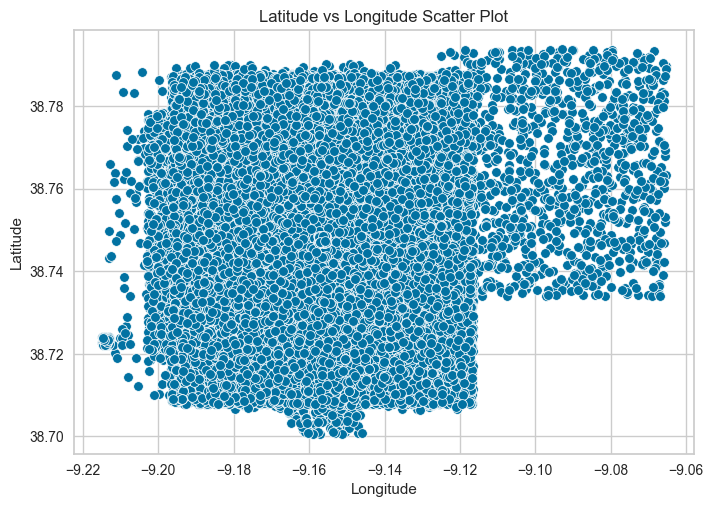

In [26]:
sns.scatterplot(data=data,x="longitude",y="latitude")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude Scatter Plot')
plt.show()

In [27]:
ref_lat = 38.736946
ref_lon = -9.142685

In [28]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.add_feature(cfeature.BORDERS)
ax.coastlines()
extent = [-10, -8, 38, 42]
ax.set_extent(extent)
ax.gridlines()

# Example scatter plot on the map:
plt.scatter(
    data.longitude,
    data.latitude,
    transform=ccrs.PlateCarree(),
    color='red', marker='o'
)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1028)>

<Figure size 800x550 with 1 Axes>

In [29]:
distances_df=[]

for index,row in data.iterrows():
  distance=np.sqrt((row["latitude"] - ref_lat)**2 + (row["longitude"] - ref_lon)**2)
  distances_df.append(distance)

In [30]:
len(distances_df)
distances_df=pd.DataFrame(distances_df)

In [31]:
print(distances_df)

              0
0      0.022876
1      0.020972
2      0.050372
3      0.017698
4      0.049409
...         ...
34055  0.041276
34056  0.027687
34057  0.042838
34058  0.014197
34059  0.016728

[34060 rows x 1 columns]


In [32]:
data["distance_center"]=distances_df

In [33]:
data.drop(columns = ["latitude","longitude","geometry"], inplace=True)

### Take care of nulls

In [34]:
data.isnull().sum()

customer_id                                   0
customer_gender                               0
kids_home                                   749
teens_home                                  783
number_complaints                          1022
distinct_stores_visited                     681
lifetime_spend_groceries                      0
lifetime_spend_electronics                    0
typical_hour                               1362
lifetime_spend_vegetables                  1022
lifetime_spend_nonalcohol_drinks              0
lifetime_spend_alcohol_drinks               681
lifetime_spend_meat                           0
lifetime_spend_fish                        1703
lifetime_spend_hygiene                        0
lifetime_spend_videogames                     0
lifetime_spend_petfood                        0
lifetime_total_distinct_products              0
percentage_of_products_bought_promotion       0
age                                         341
loyalty_card_have                       

In [35]:
data_cl_1 = data.copy()

Changing kids_home, teens_home, distinct_store_visited and number_complaints nulls to 0 or 1, because most of the time if there is no record of this it means that this person does not have it or in case of stores visited only one

In [36]:
data_cl_1['kids_home'] = data_cl_1['kids_home'].fillna(0)
data_cl_1['teens_home'] = data_cl_1['teens_home'].fillna(0)
data_cl_1['number_complaints'] = data_cl_1['number_complaints'].fillna(0)
data_cl_1['distinct_stores_visited'] = data_cl_1['distinct_stores_visited'].fillna(1)

Here we change spending columns nulls because if there i no record that means that this person did not spend anything

In [37]:
spend_columns = [col for col in data_cl_1.columns if col.startswith('lifetime_spend_')]
data_cl_1[spend_columns] = data_cl_1[spend_columns].fillna(0)

Changing typical_hour and age nulls to median because every person has its own hour to come or age so this values can not be imputed by random

In [38]:
# typical_hour
median_hour = data_cl_1['typical_hour'].median()
data_cl_1['typical_hour'] = data_cl_1['typical_hour'].fillna(median_hour)

# age
median_age = data_cl_1['age'].median()
data_cl_1['age'] = data_cl_1['age'].fillna(median_age)

Checking is there any nulls left

In [39]:
data_cl_1.isnull().sum()

customer_id                                0
customer_gender                            0
kids_home                                  0
teens_home                                 0
number_complaints                          0
distinct_stores_visited                    0
lifetime_spend_groceries                   0
lifetime_spend_electronics                 0
typical_hour                               0
lifetime_spend_vegetables                  0
lifetime_spend_nonalcohol_drinks           0
lifetime_spend_alcohol_drinks              0
lifetime_spend_meat                        0
lifetime_spend_fish                        0
lifetime_spend_hygiene                     0
lifetime_spend_videogames                  0
lifetime_spend_petfood                     0
lifetime_total_distinct_products           0
percentage_of_products_bought_promotion    0
age                                        0
loyalty_card_have                          0
customer_relationship_year                 0
distance_c

### Handling outliers

In [40]:
data_cl_2 = data_cl_1.copy()

/var/folders/f2/5_t719y12k71w48gv5m_mm2c0000gn/T/ipykernel_2714/443167393.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


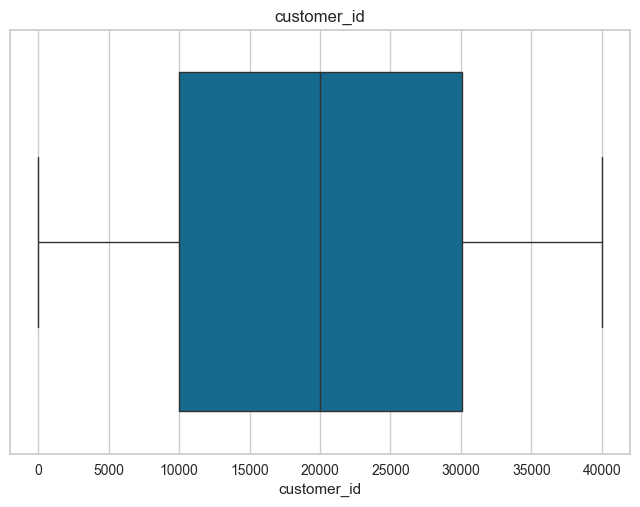

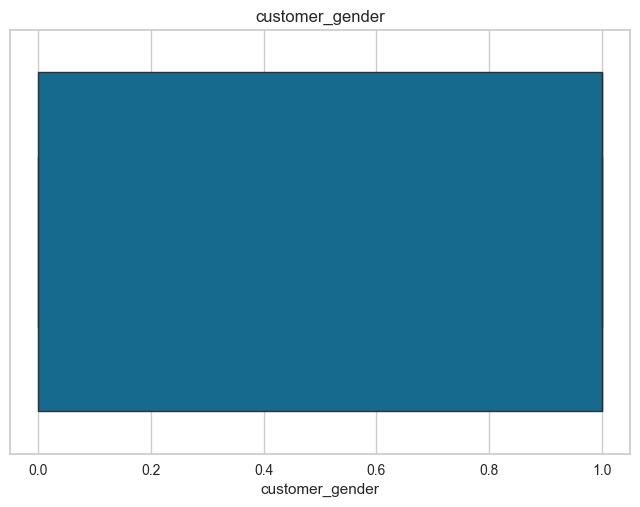

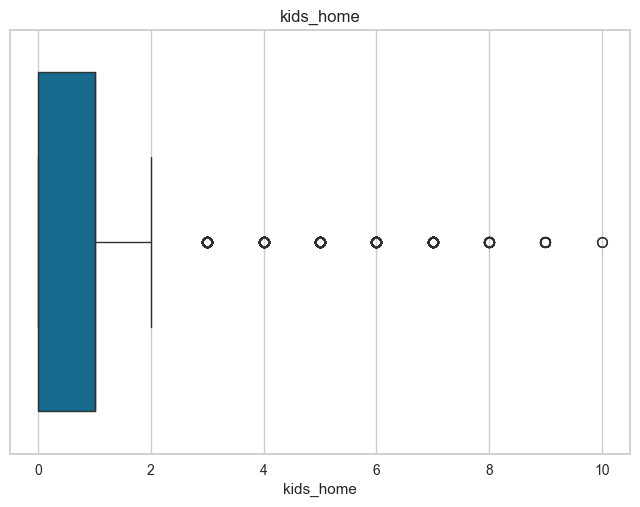

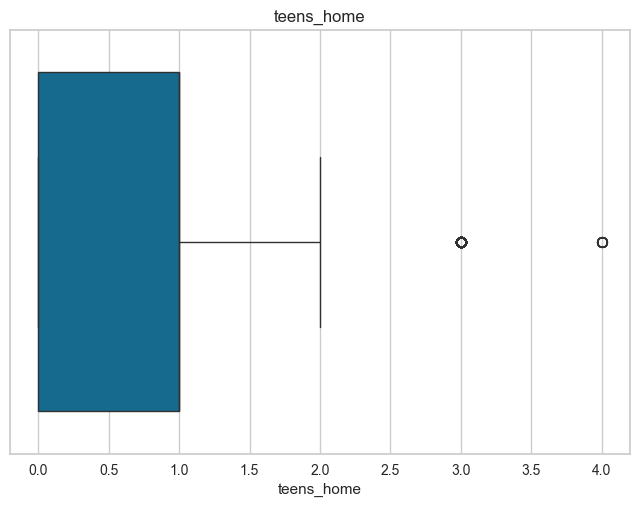

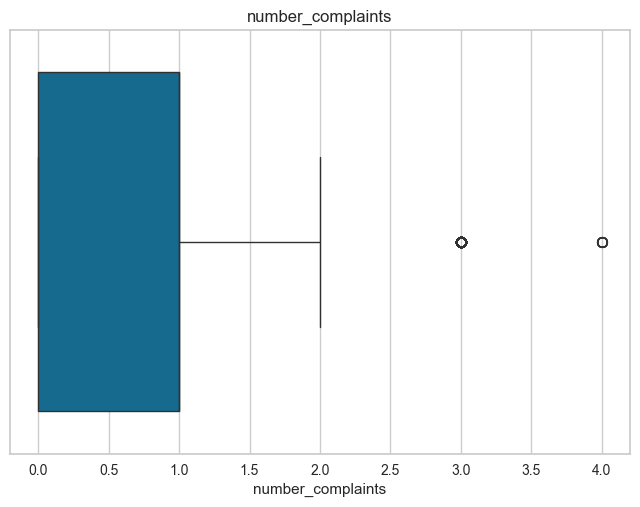

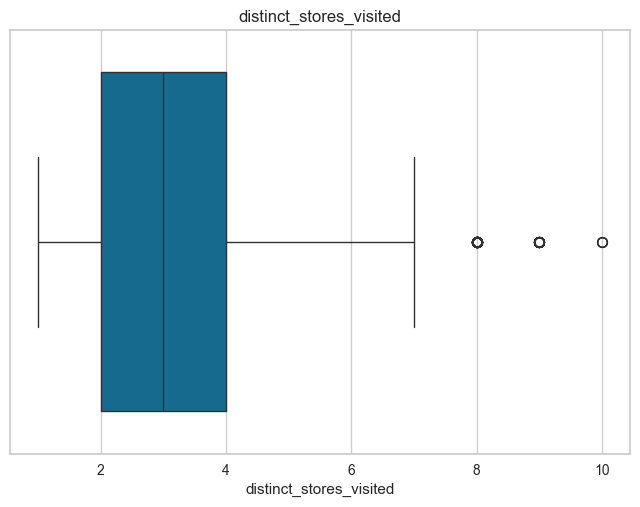

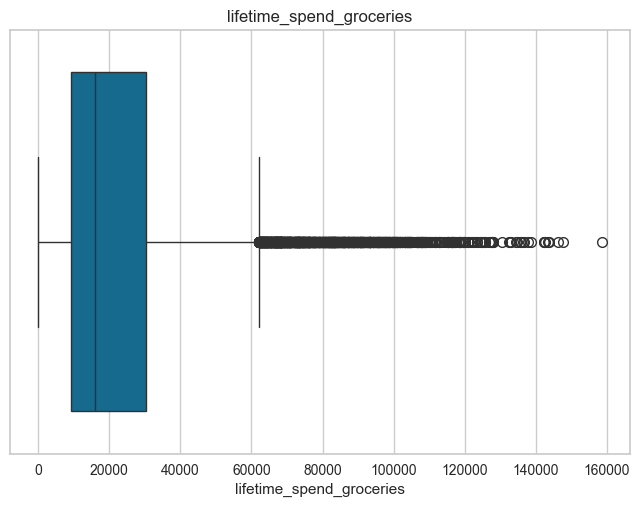

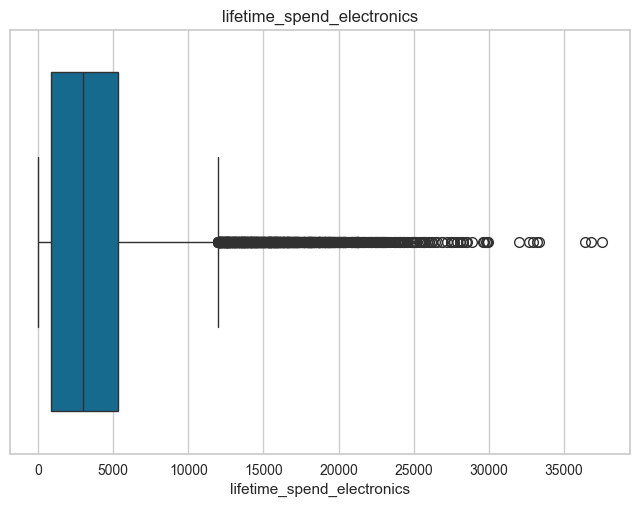

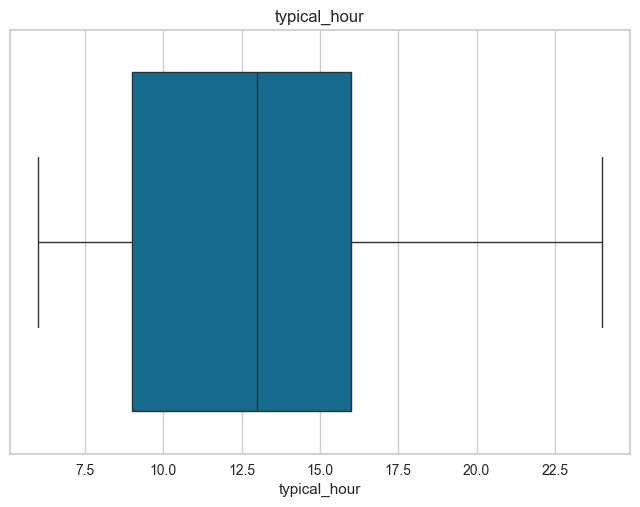

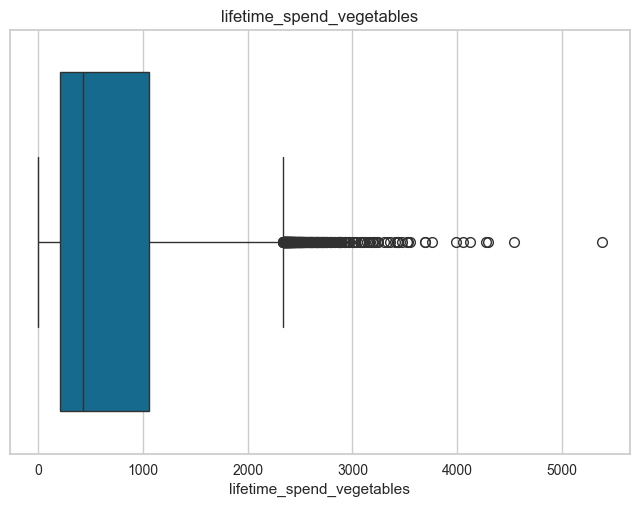

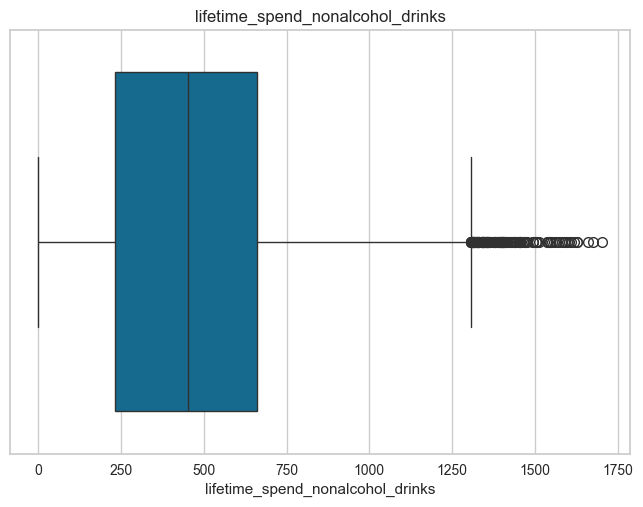

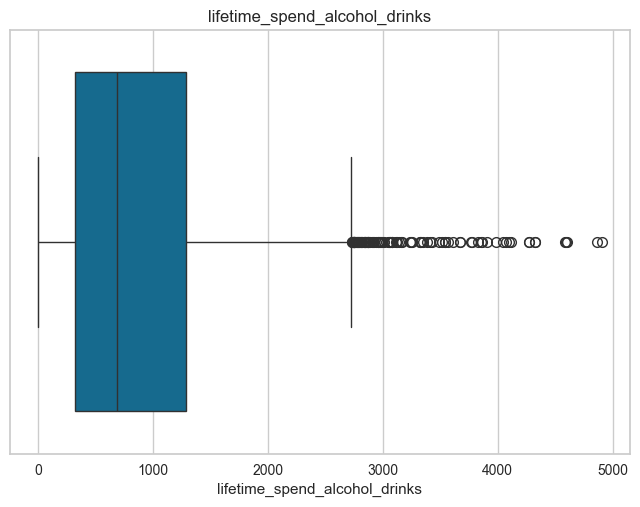

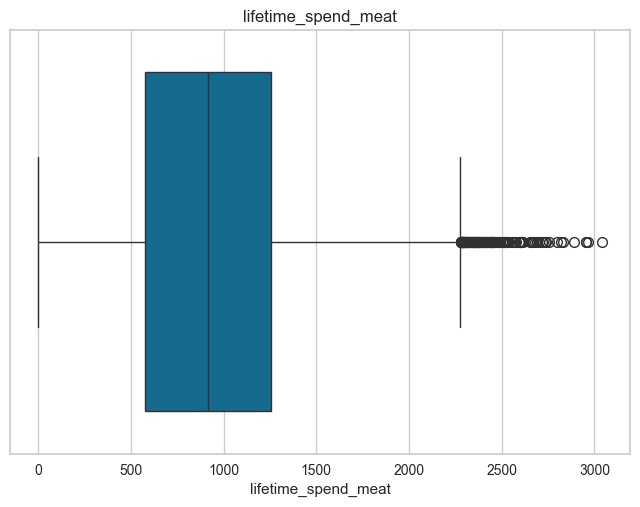

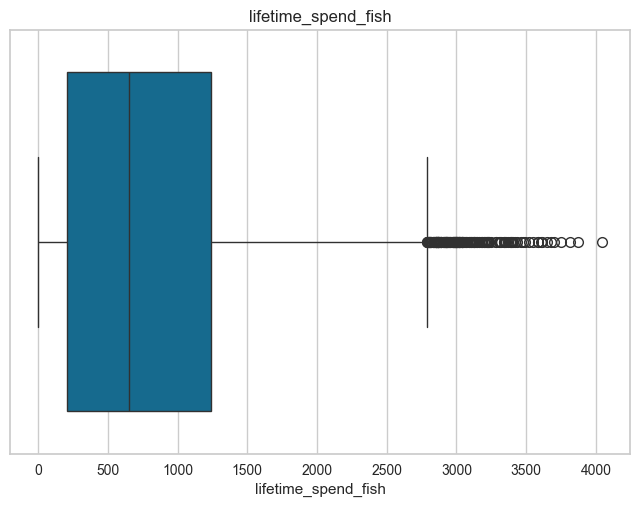

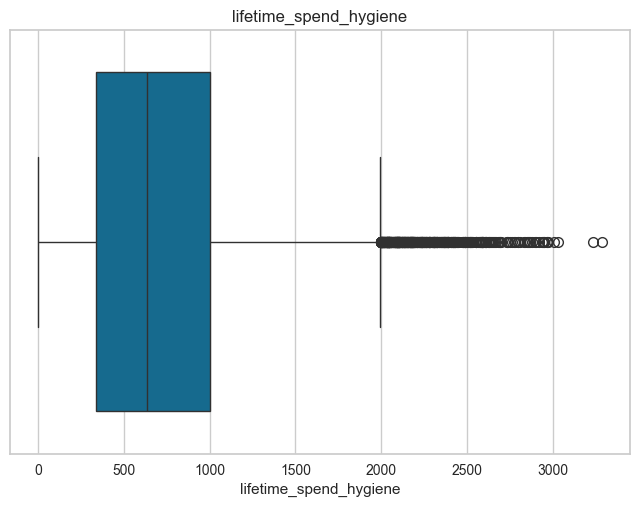

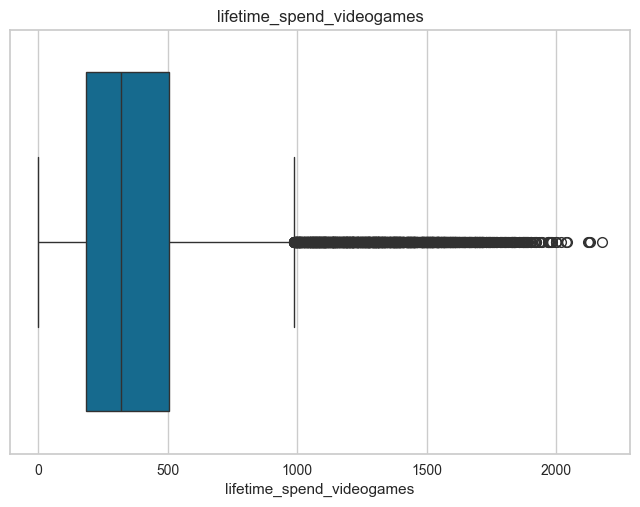

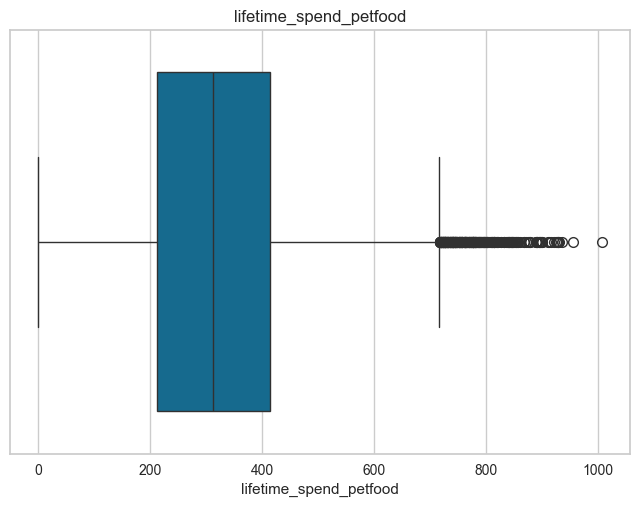

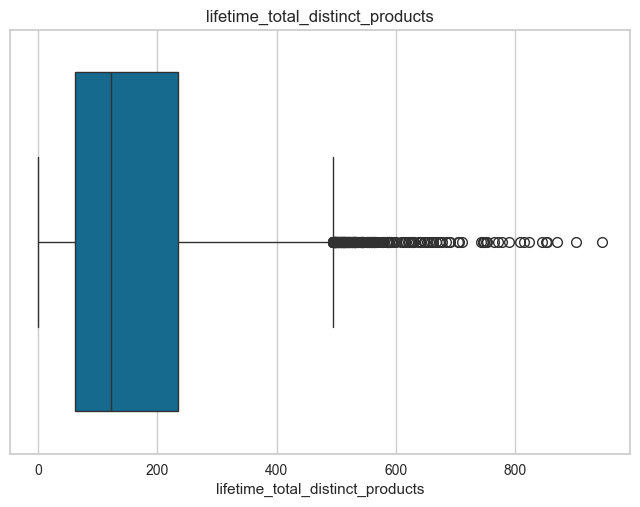

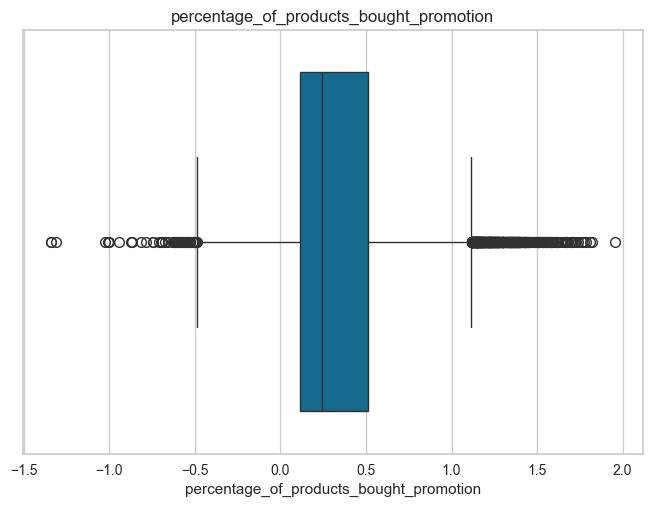

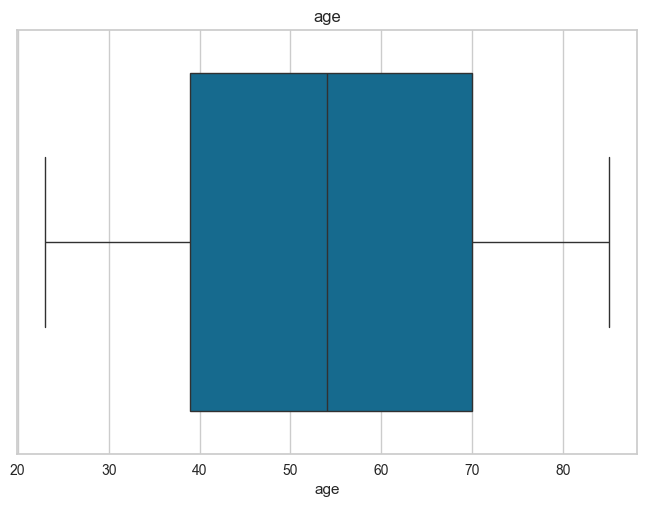

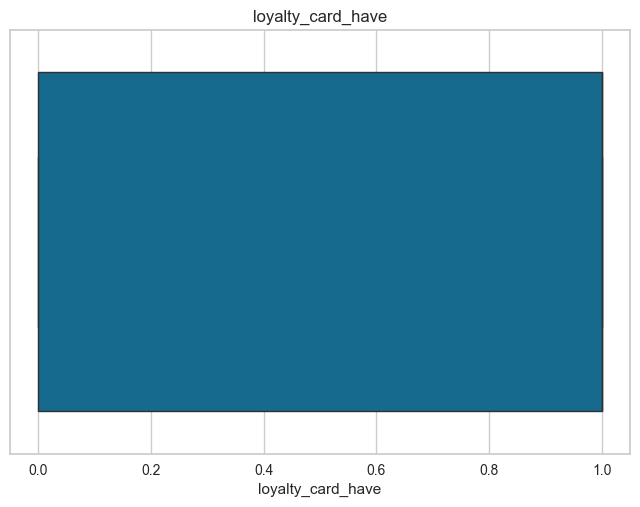

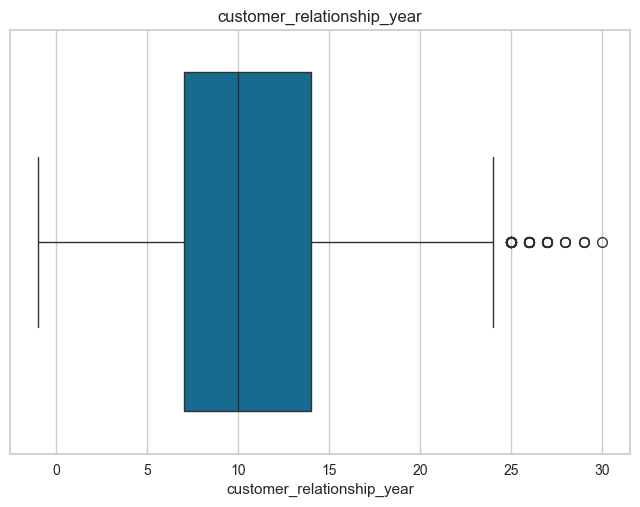

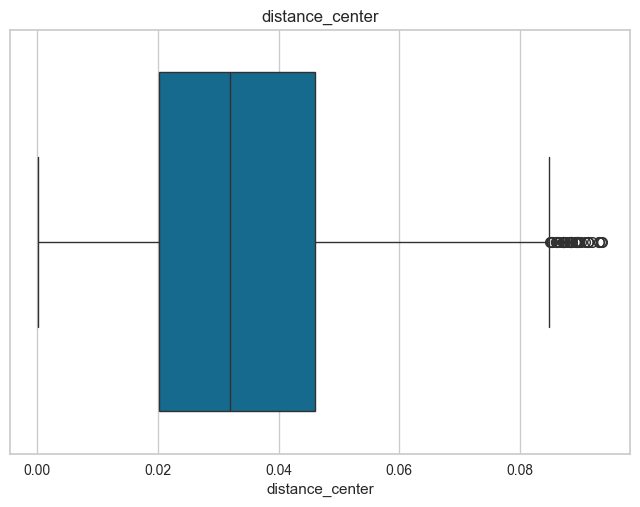

In [41]:
for column in data_cl_2.columns:
    plt.figure()
    sns.boxplot(x=data_cl_2[column])
    plt.title(column)

In [42]:
outliers, proportions = calculate_outliers(data_cl_2)

for column, proportion in proportions.items():
    print(f"Proportion of outliers in {column}: {proportion}")

Proportion of outliers in customer_id: 0.0
Proportion of outliers in customer_gender: 0.0
Proportion of outliers in kids_home: 0.10452143276570758
Proportion of outliers in teens_home: 0.028244274809160305
Proportion of outliers in number_complaints: 0.01996476805637111
Proportion of outliers in distinct_stores_visited: 0.0037287140340575456
Proportion of outliers in lifetime_spend_groceries: 0.05819142689371697
Proportion of outliers in lifetime_spend_electronics: 0.04618320610687023
Proportion of outliers in typical_hour: 0.0
Proportion of outliers in lifetime_spend_vegetables: 0.012272460364063417
Proportion of outliers in lifetime_spend_nonalcohol_drinks: 0.004521432765707575
Proportion of outliers in lifetime_spend_alcohol_drinks: 0.002906635349383441
Proportion of outliers in lifetime_spend_meat: 0.005695830886670581
Proportion of outliers in lifetime_spend_fish: 0.00546095126247798
Proportion of outliers in lifetime_spend_hygiene: 0.015091015854374633
Proportion of outliers in l

In [43]:
columns_with_outliers = ['kids_home', 'teens_home', 'number_complaints', 'distinct_stores_visited', 'customer_relationship_year']
data_cl_2 = cap_outliers(data_cl_2, columns_with_outliers)

In [44]:
data_cl_2.isnull().sum()

customer_id                                0
customer_gender                            0
kids_home                                  0
teens_home                                 0
number_complaints                          0
distinct_stores_visited                    0
lifetime_spend_groceries                   0
lifetime_spend_electronics                 0
typical_hour                               0
lifetime_spend_vegetables                  0
lifetime_spend_nonalcohol_drinks           0
lifetime_spend_alcohol_drinks              0
lifetime_spend_meat                        0
lifetime_spend_fish                        0
lifetime_spend_hygiene                     0
lifetime_spend_videogames                  0
lifetime_spend_petfood                     0
lifetime_total_distinct_products           0
percentage_of_products_bought_promotion    0
age                                        0
loyalty_card_have                          0
customer_relationship_year                 0
distance_c

### Featuring typical_hour

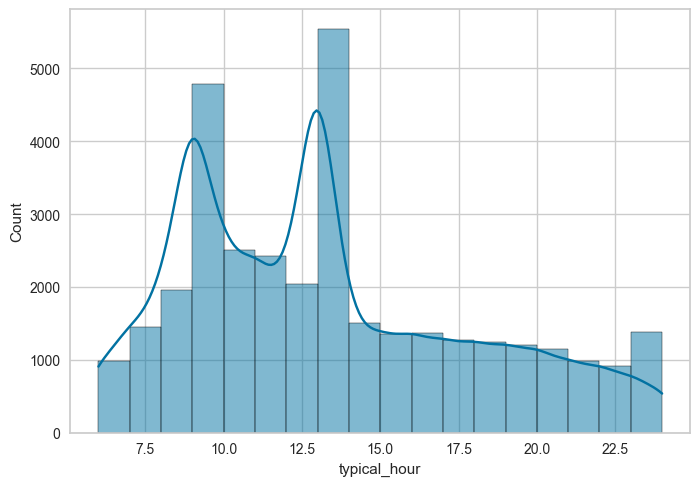

In [45]:
sns.histplot(data=data_cl_2, x="typical_hour", bins=18, kde=True)
plt.show()

In [46]:
data_cl_2["time_slot"] = data_cl_2["typical_hour"].apply(find_time_slot)

In [47]:
data_cl_2.head()

customer_id  customer_gender  kids_home  teens_home  number_complaints  \
0        29930                0        2.0         2.0                1.0   
1         6813                1        0.0         1.0                0.0   
2        39451                0        2.0         2.5                0.0   
3        21557                1        0.0         0.0                1.0   
4        16415                1        1.0         1.0                1.0   

   distinct_stores_visited  lifetime_spend_groceries  \
0                      4.0                    7789.0   
1                      4.0                    8653.0   
2                      7.0                   15605.0   
3                      1.0                   13440.0   
4                      5.0                   49250.0   

   lifetime_spend_electronics  typical_hour  lifetime_spend_vegetables  ...  \
0                      5601.0          13.0                      726.0  ...   
1                        35.0          14.0                      792.0  ...   
2                      4275.0          14.0                     1585.0  ...   
3                     16366.0          14.0                       28.0  ...   
4                      3197.0          14.0                      258.0  ...   

   lifetime_spend_hygiene  lifetime_spend_videogames  lifetime_spend_petfood  \
0                   457.0                      412.0                   428.0   
1                   394.0                       75.0                   226.0   
2                   920.0                      335.0                   192.0   
3                   139.0                      679.0                   270.0   
4                  1046.0                      112.0                   144.0   

   lifetime_total_distinct_products  percentage_of_products_bought_promotion  \
0                             386.0                                 0.158741   
1                              73.0                                 1.227890   
2                             319.0                                 0.101598   
3                             221.0                                 0.259943   
4                             244.0                                 0.317822   

    age  loyalty_card_have  customer_relationship_year  distance_center  \
0  53.0                  0                         7.0         0.022876   
1  81.0                  1                        12.0         0.020972   
2  36.0                  0                        14.0         0.050372   
3  49.0                  0                        16.0         0.017698   
4  59.0                  1                        13.0         0.049409   

   time_slot  
0          3  
1          3  
2          3  
3          3  
4          3  

[5 rows x 24 columns]

### Featuring Number of Underage people in house

In [48]:
data_cl_2['underage_home'] = data_cl_2['kids_home'] + data_cl_2['teens_home']

In [49]:
data_cl_2.drop(columns=['kids_home', 'teens_home'], inplace=True)

### Correlation Matrix

In [50]:
data_for_corr = data_cl_2.copy()

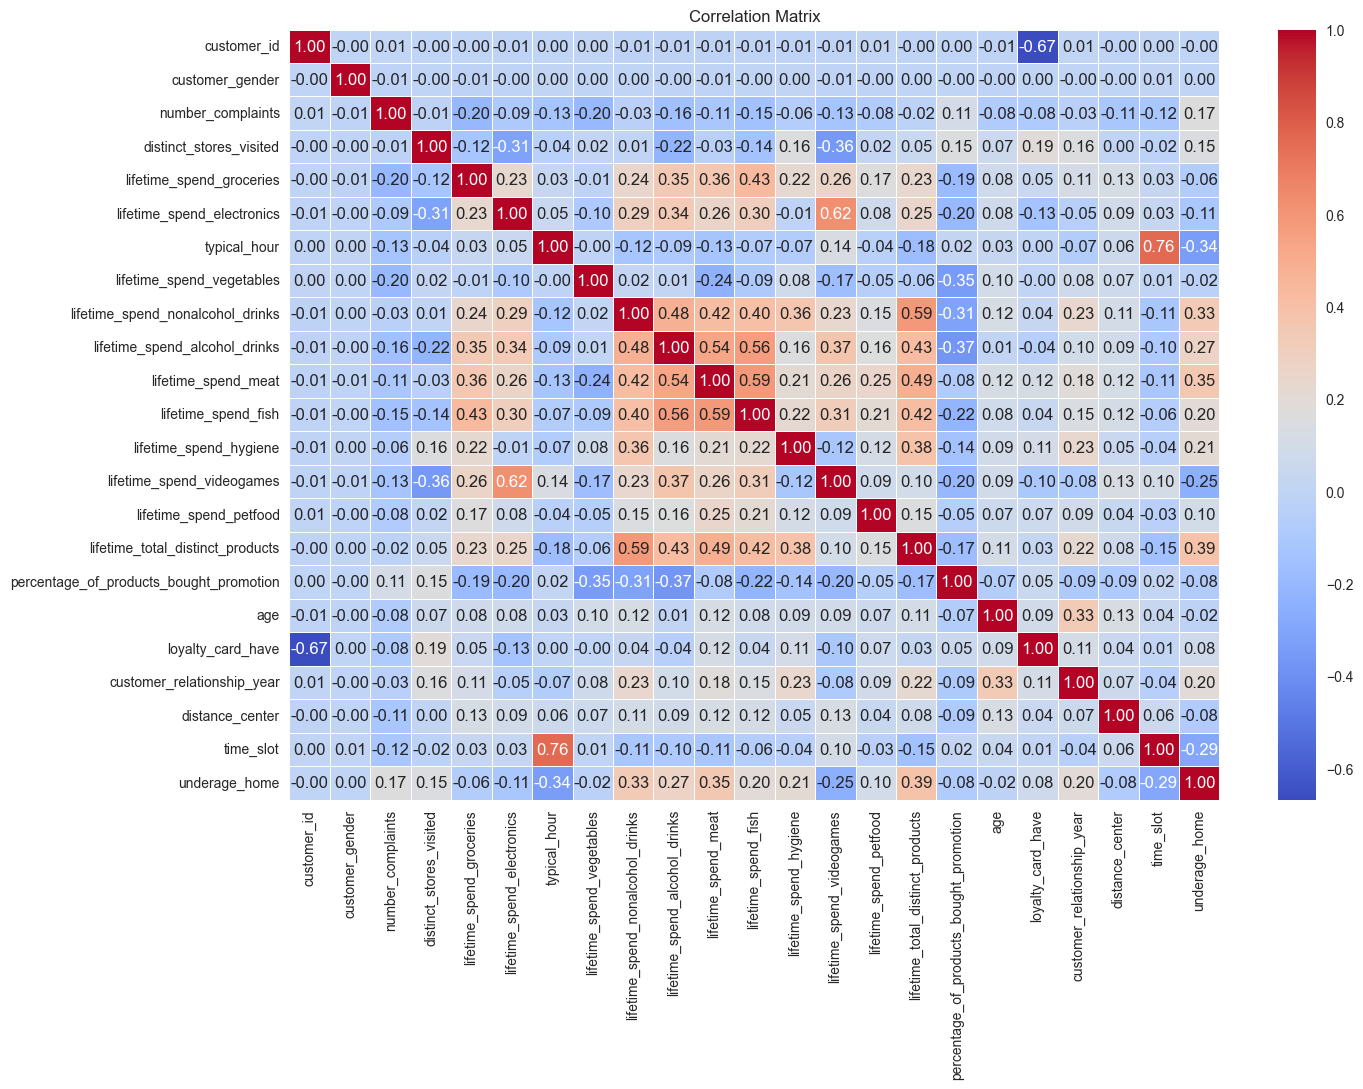

In [51]:
# Correlation matrix
correlation_matrix = data_for_corr.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Some Visualizations

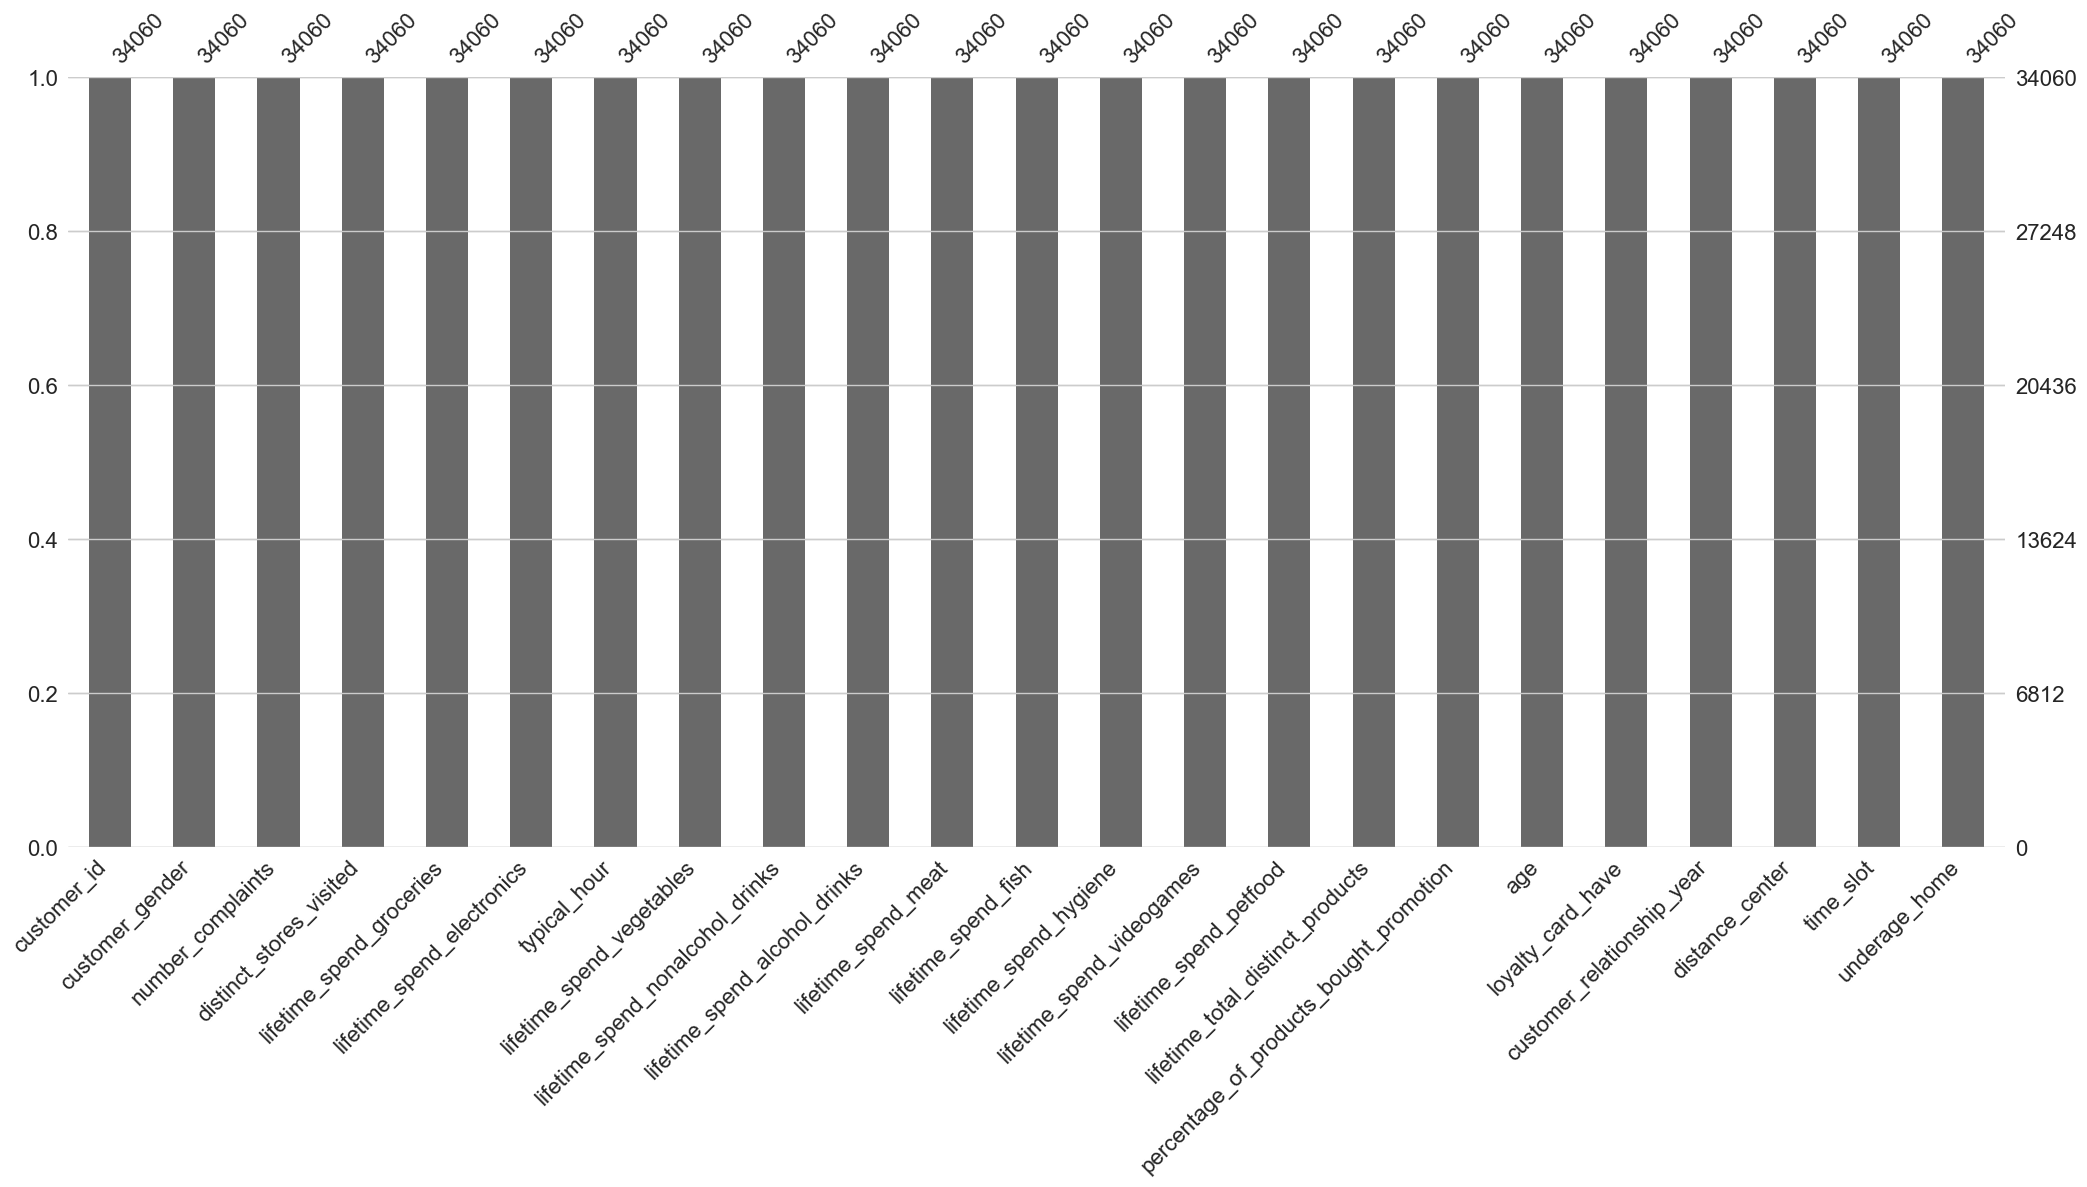

In [52]:
msno.bar(data_cl_2)
plt.show()

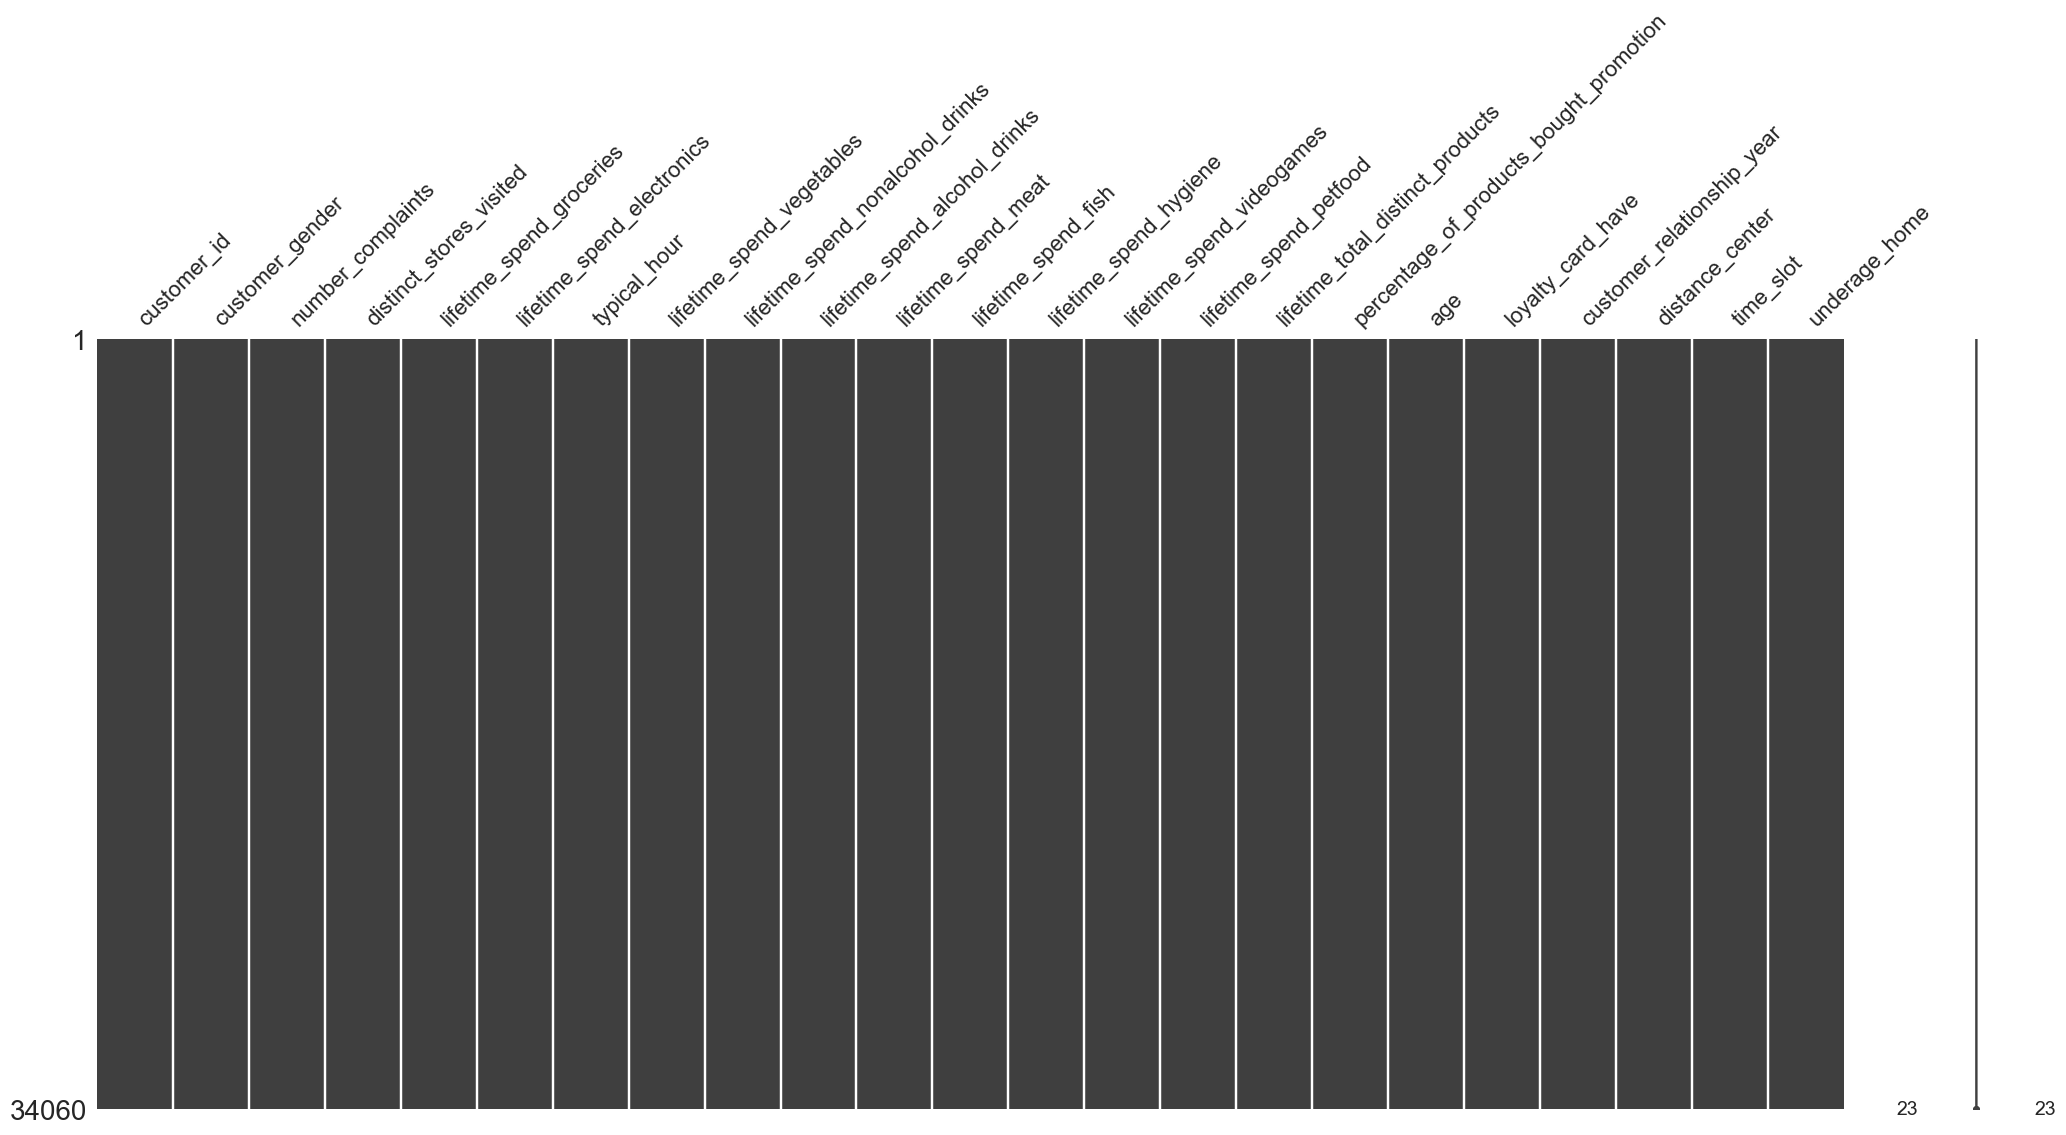

In [53]:
msno.matrix(data_cl_2)
plt.show()

### RFM Analysis

In [54]:
data_rfm = data_cl_2.copy()

In [55]:
# Recency (in years since first transaction)
data_rfm['Recency'] = data_rfm['customer_relationship_year']

# Frequency — use "distinct_stores_visited" as proxy
data_rfm['Frequency'] = data_rfm['distinct_stores_visited']

# Monetary — total lifetime spend (sum of all spend columns)
spend_columns = [col for col in data_rfm.columns if col.startswith('lifetime_spend_')]
data_rfm['Monetary'] = data_rfm[spend_columns].sum(axis=1)

In [56]:
# Assign quintiles for each RFM component
data_rfm['R_quintile'] = pd.qcut(data_rfm['Recency'], 5, labels=[5,4,3,2,1])
f_quintile = pd.qcut(data_rfm['Frequency'], 5, duplicates='drop')
data_rfm['F_quintile'] = f_quintile.cat.codes + 1
data_rfm['M_quintile'] = pd.qcut(data_rfm['Monetary'], 5, labels=[1,2,3,4,5])

In [57]:
# Create RFM Cell ID
data_rfm['RFM_Cell'] = data_rfm['R_quintile'].astype(str) + data_rfm['F_quintile'].astype(str) + data_rfm['M_quintile'].astype(str)

In [58]:
# Example of RFM cell distribution
rfm_counts = data_rfm['RFM_Cell'].value_counts().reset_index()
rfm_counts.columns = ['RFM_Cell', 'num_customers']

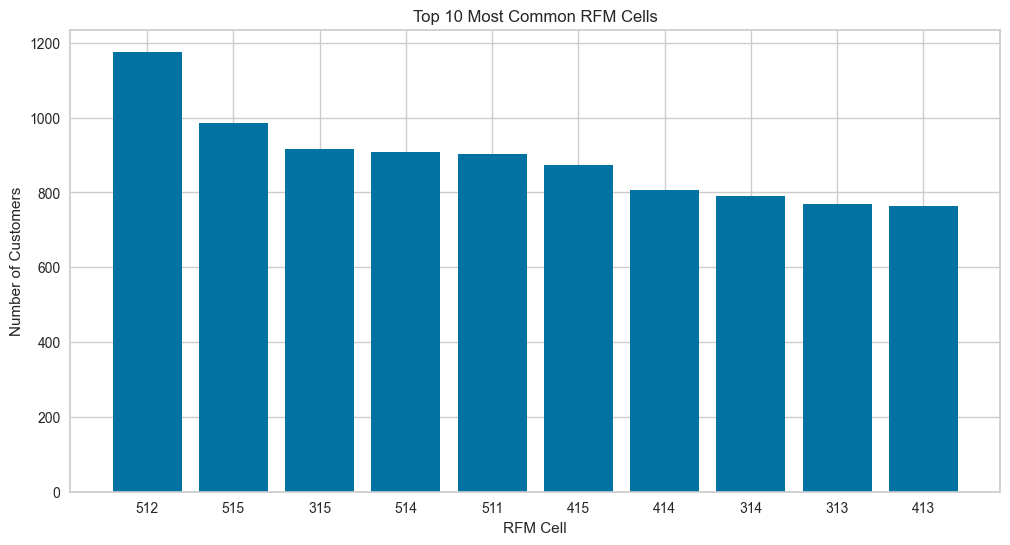

In [59]:
# Plot top 10 most common RFM cells
plt.figure(figsize=(12,6))
plt.bar(rfm_counts['RFM_Cell'][:10], rfm_counts['num_customers'][:10])
plt.title('Top 10 Most Common RFM Cells')
plt.xlabel('RFM Cell')
plt.ylabel('Number of Customers')
plt.show()

# KMeans Clustering

In [60]:
# Feature selection
spend_columns = [col for col in data_cl_2.columns if col.startswith('lifetime_spend_')]

features_selected = [
    'age',
    'underage_home',
    'lifetime_total_distinct_products',
    'percentage_of_products_bought_promotion',
    'distance_center',
] + spend_columns

# DATA for pipeline
X = data_cl_2[features_selected]

# Pipeline for KMeans (imputer + scaler only)
pipeline_kmeans = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

X_scaled = pipeline_kmeans.fit_transform(X)  # это пойдёт в KMeans

In [61]:
data_cluster = data_cl_2.copy()

In [62]:
range_n_clusters = range(4, 7)  # Можно 2..10

In [63]:
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.4f}")

For n_clusters = 4, the average silhouette_score is : 0.2089
For n_clusters = 5, the average silhouette_score is : 0.2054
For n_clusters = 6, the average silhouette_score is : 0.2120


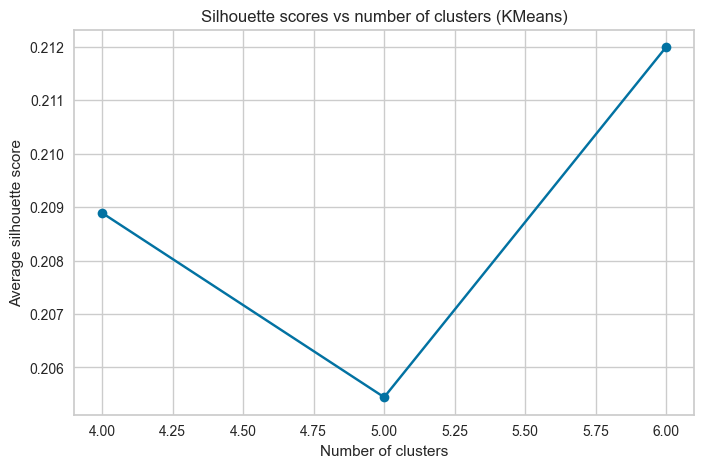

In [64]:
# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title("Silhouette scores vs number of clusters (KMeans)")
plt.xlabel("Number of clusters")
plt.ylabel("Average silhouette score")
plt.grid(True)
plt.show()

In [65]:
# Выбираем "оптимальный" K (глазами с графика или берем argmax)
optimal_k = range_n_clusters[np.argmax(silhouette_avg_scores)]
print(f"Optimal number of clusters based on silhouette: {optimal_k}")

Optimal number of clusters based on silhouette: 6


In [66]:
# Final KMeans run
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data_cluster['KMeansCluster'] = final_kmeans.fit_predict(X_scaled)

In [67]:
# PCA Visualization of final KMeans result
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

In [68]:
data_cluster['PCA1'] = pca_components[:,0]
data_cluster['PCA2'] = pca_components[:,1]

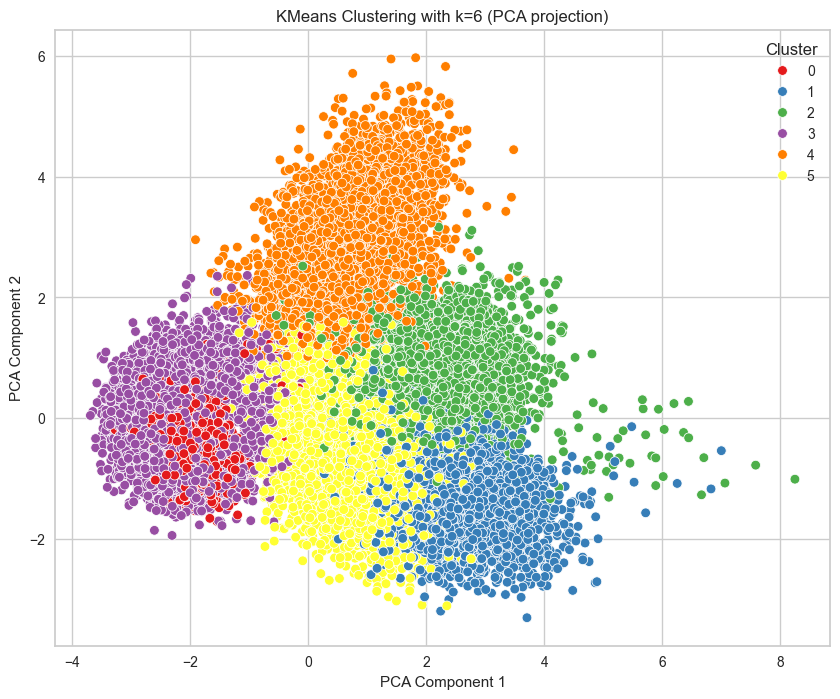

In [69]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_cluster, x='PCA1', y='PCA2', hue='KMeansCluster', palette='Set1')
plt.title(f'KMeans Clustering with k={optimal_k} (PCA projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

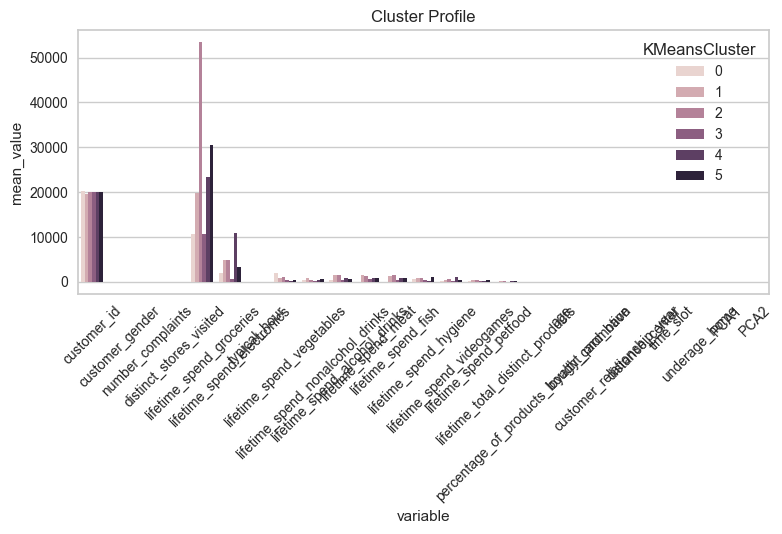

In [70]:
# Plot cluster profile using function
plot_cluster_profile(data_cluster, feature_columns=[col for col in data_cluster.columns if col != 'KMeansCluster'], cluster_col='KMeansCluster')


# DBSCAN Clustering

In [71]:
# 1. K-distance graph for defing eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

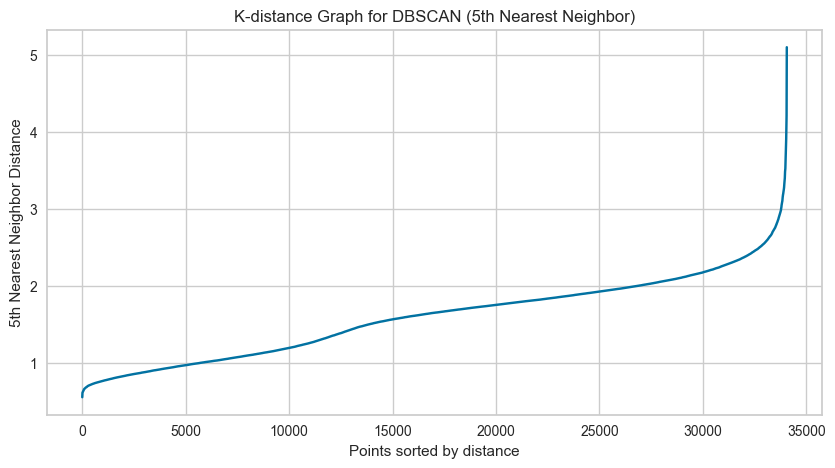

In [72]:
distances = np.sort(distances[:, 4], axis=0)

# Plot K-distance graph
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN (5th Nearest Neighbor)')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.grid(True)
plt.show()


In [73]:
eps_value = 2.0
min_samples_value = 5

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [74]:
# Adding to data_cluster
data_cluster['DBSCAN_cluster'] = dbscan_labels

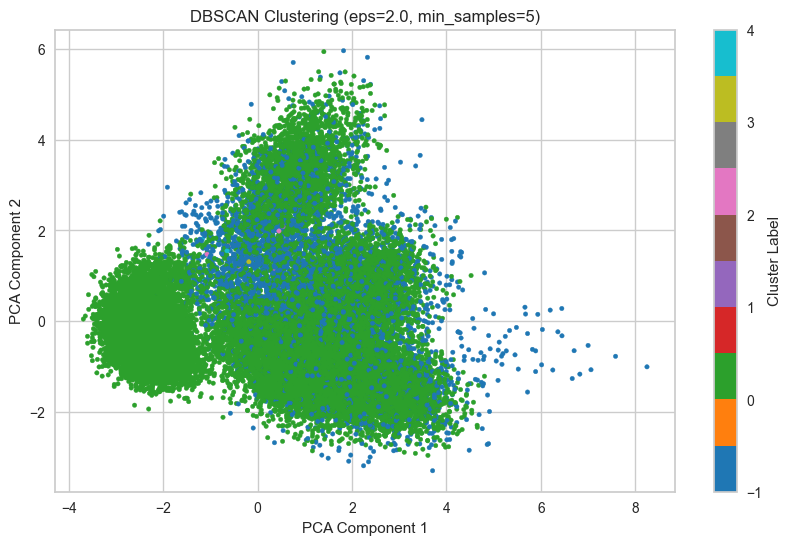

In [75]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap='tab10', s=10)
plt.title(f'DBSCAN Clustering (eps={eps_value}, min_samples={min_samples_value})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [76]:
# Посмотрим сколько кластеров нашел DBSCAN
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f'Number of clusters found by DBSCAN: {n_clusters_dbscan}')
print(f'Number of noise points: {n_noise}')

Number of clusters found by DBSCAN: 5
Number of noise points: 3886


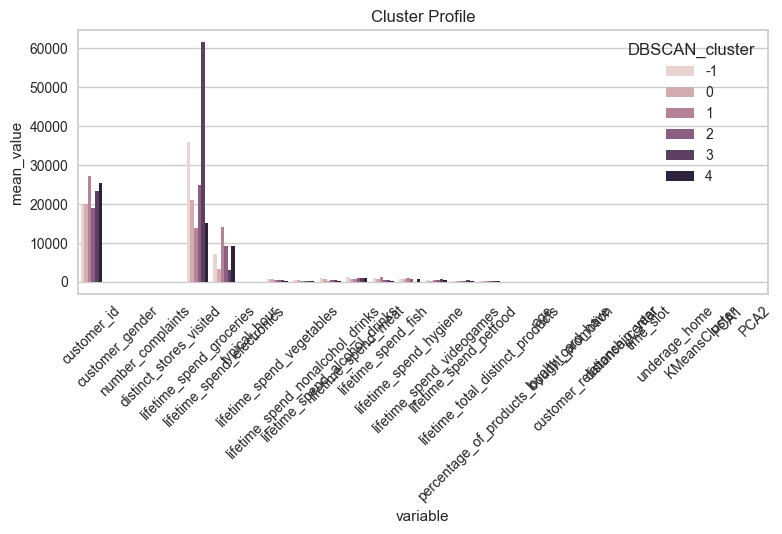

In [77]:
# Plot cluster profile using function
plot_cluster_profile(data_cluster, feature_columns=[col for col in data_cluster.columns if col != 'DBSCAN_cluster'], cluster_col='DBSCAN_cluster')

# Tandem Approach

In [78]:
features_for_clustering = X_scaled 

In [79]:
# Compute linkage matrix
linked = linkage(features_for_clustering, method='ward')

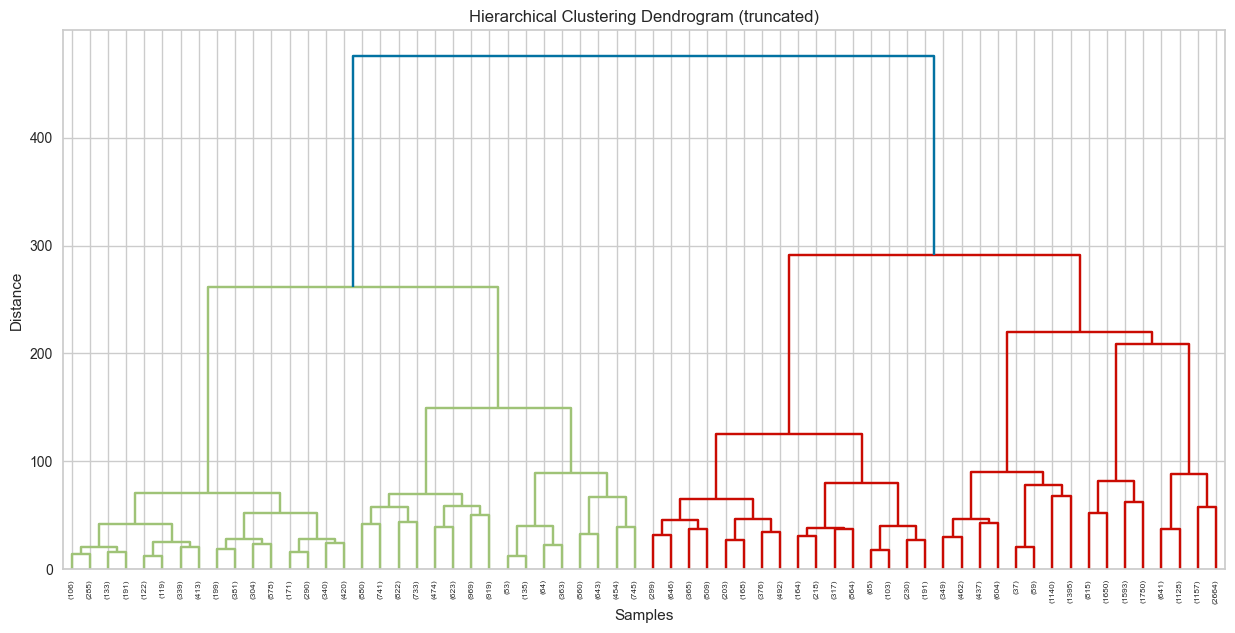

In [80]:
# Plot dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [81]:
# Cut the dendrogram to form initial clusters (пример: берем K=4, можно варьировать)
num_clusters_hier = 4
hier_labels = fcluster(linked, num_clusters_hier, criterion='maxclust')

In [82]:
# Добавим эти лейблы к датафрейму
data_cluster['HierarchicalCluster'] = hier_labels

In [83]:
# Запускаем KMeans с тем же числом кластеров
kmeans_tandem = KMeans(n_clusters=num_clusters_hier, random_state=42, n_init=10)
data_cluster['TandemKMeansCluster'] = kmeans_tandem.fit_predict(features_for_clustering)

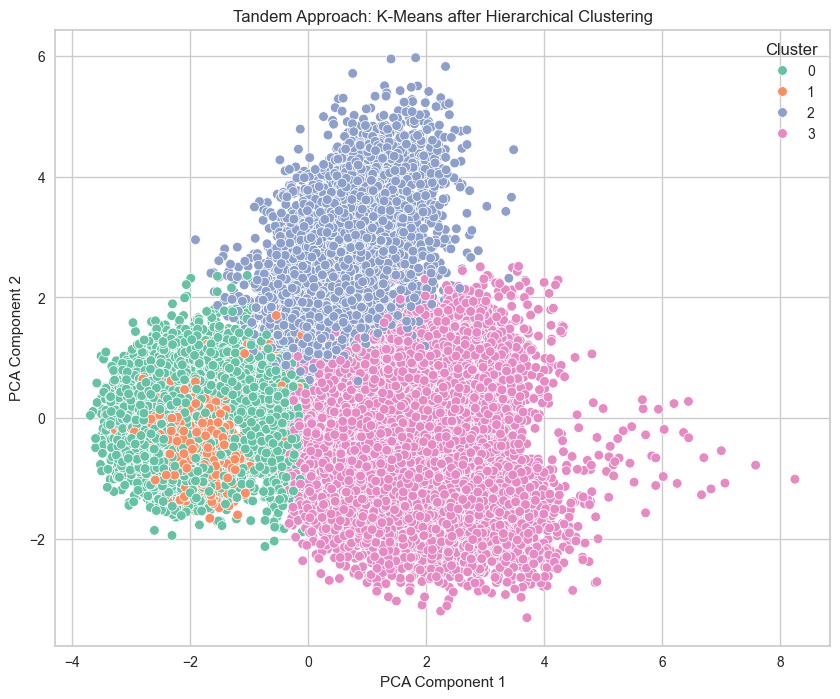

In [84]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_for_clustering)

data_cluster['PCA1'] = pca_components[:,0]
data_cluster['PCA2'] = pca_components[:,1]

plt.figure(figsize=(10,8))
sns.scatterplot(data=data_cluster, x='PCA1', y='PCA2', hue='TandemKMeansCluster', palette='Set2')
plt.title('Tandem Approach: K-Means after Hierarchical Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


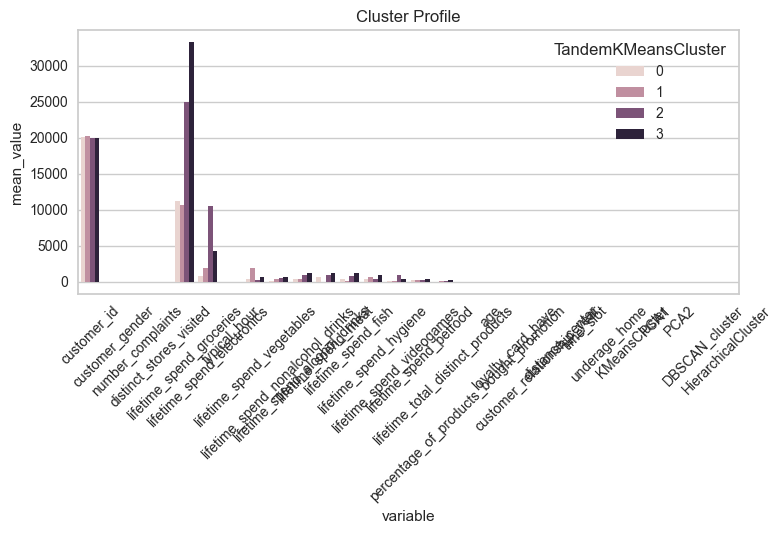

In [85]:
# Plot cluster profile using function
plot_cluster_profile(data_cluster, feature_columns=[col for col in data_cluster.columns if col != 'TandemKMeansCluster'], cluster_col='TandemKMeansCluster')

# Mean-Shift

In [86]:
# MeanShift
meanshift = MeanShift()
labels_ms = meanshift.fit_predict(X_scaled)

In [87]:
data_cluster['MScluster'] = labels_ms

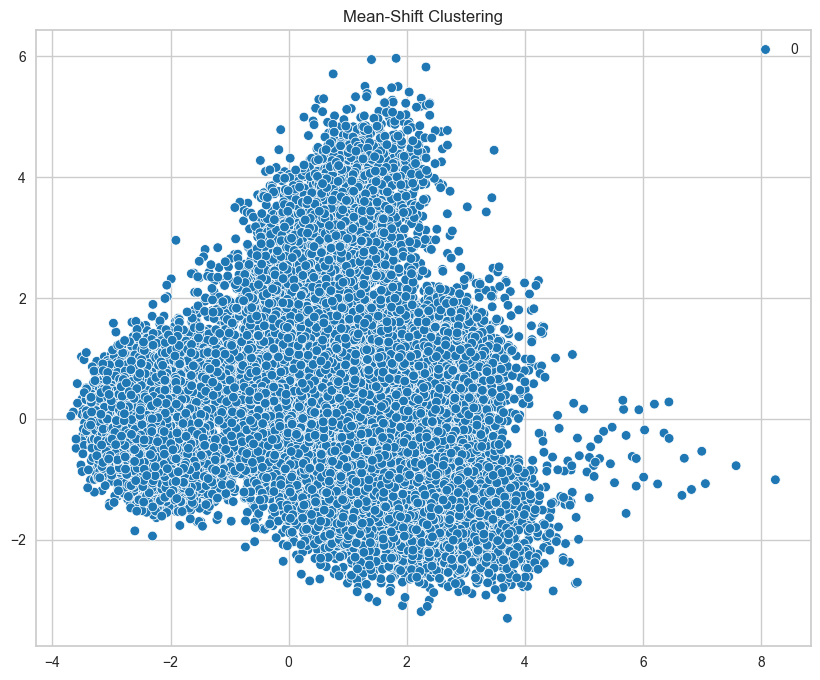

In [88]:
# Visualization PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_ms, palette='tab10')
plt.title('Mean-Shift Clustering')
plt.show()

In [89]:
# Amount of clusters
n_clusters_ms = len(np.unique(labels_ms))
print(f"Mean-Shift found {n_clusters_ms} clusters.")

Mean-Shift found 1 clusters.


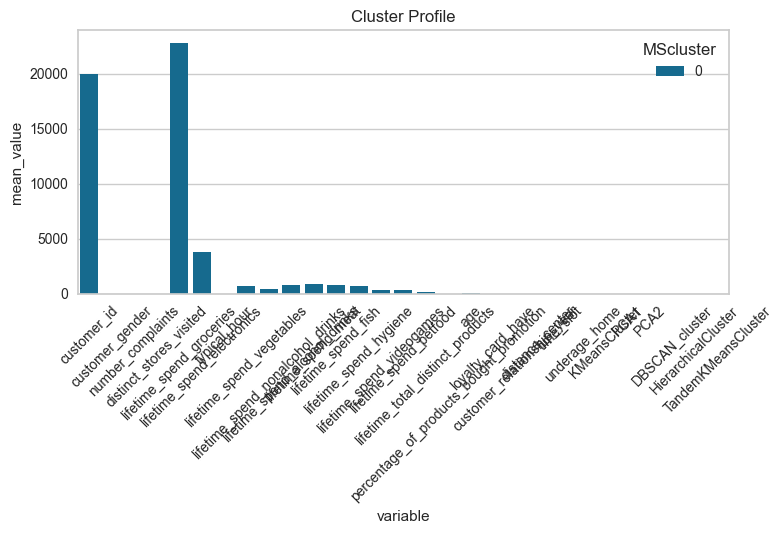

In [90]:
# Plot cluster profile using function
plot_cluster_profile(data_cluster, feature_columns=[col for col in data_cluster.columns if col != 'MScluster'], cluster_col='MScluster')

# LOF

In [91]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02) 
y_pred = lof.fit_predict(X_scaled)
data_cluster['LOF_outlier'] = (y_pred == -1).astype(int)

# Сколько аномалий найдено
n_outliers = data_cluster['LOF_outlier'].sum()
print(f"Number of anomalies found by LOF: {n_outliers} ({n_outliers/len(data_cluster)*100:.2f}%)")

Number of anomalies found by LOF: 682 (2.00%)


# UMAP

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


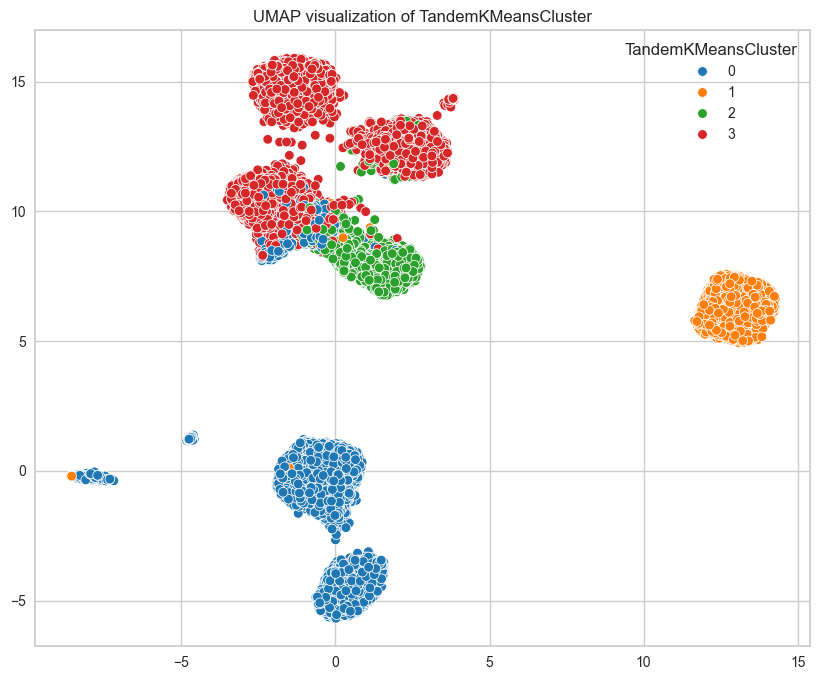

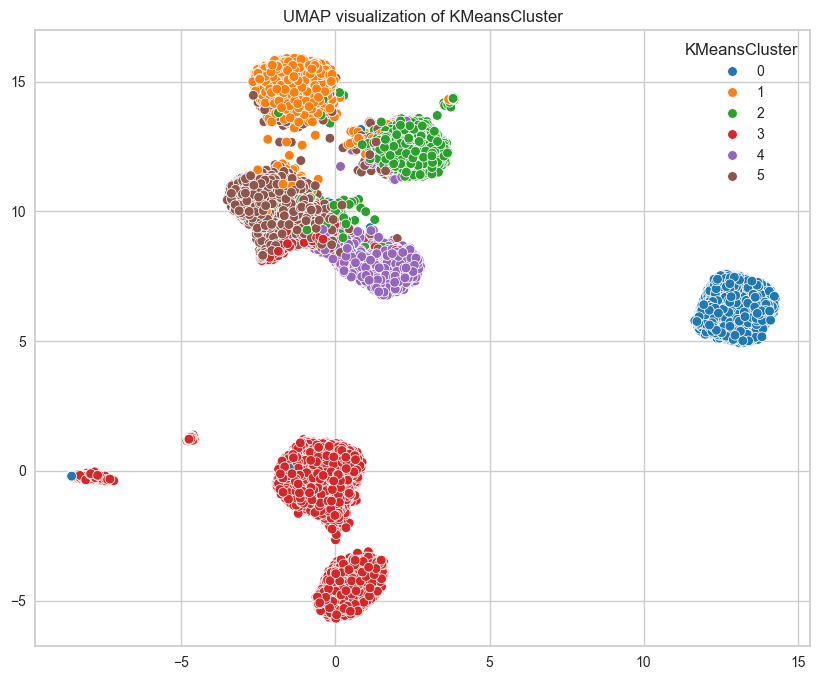

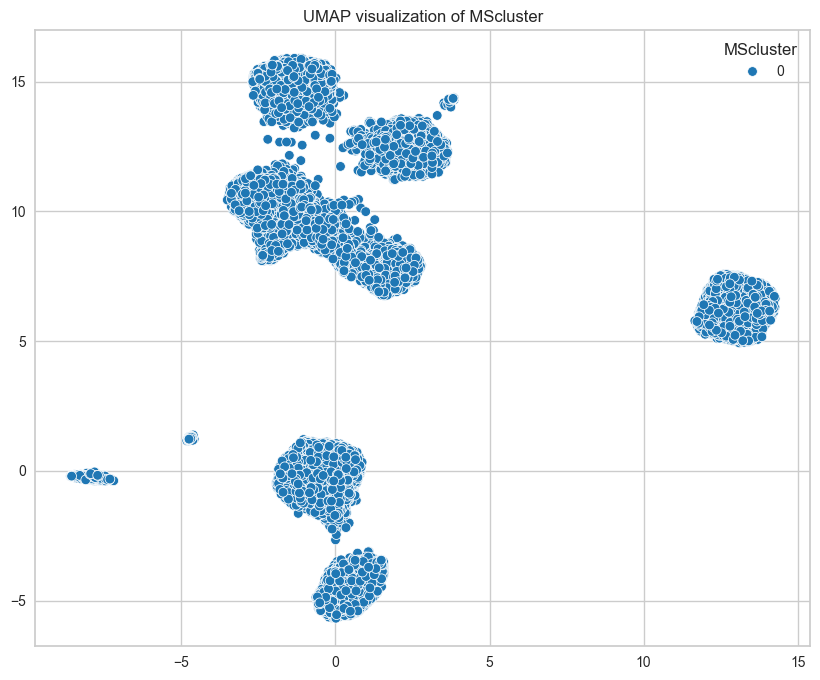

In [92]:
reducer = umap.UMAP(n_neighbors=30, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(X_scaled)

universal_labels = ['TandemKMeansCluster','KMeansCluster','MScluster'] # например, для MeanShift

for label in universal_labels:
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=data_cluster[label], palette='tab10')
    plt.title(f'UMAP visualization of {label}')
    plt.show()


# t-SNE

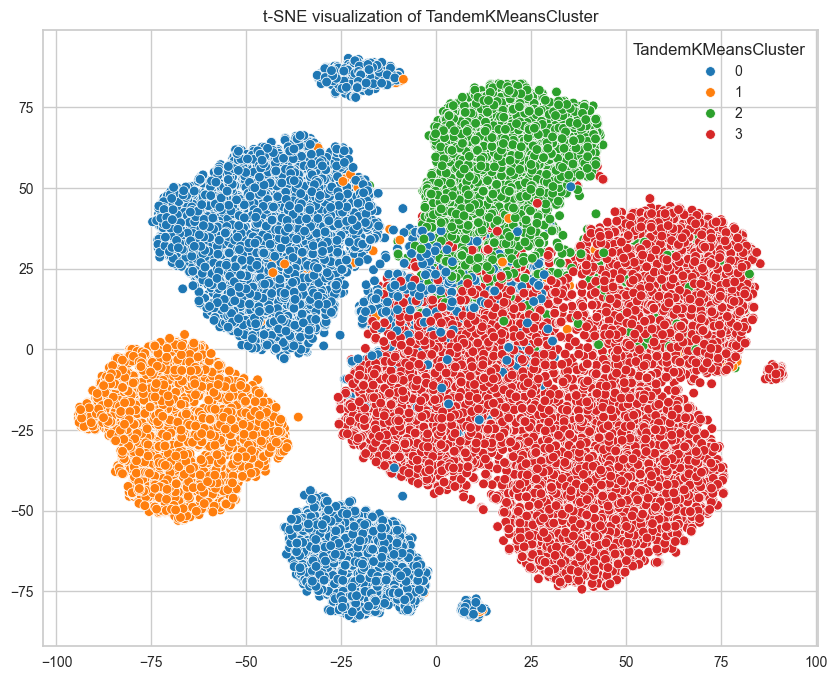

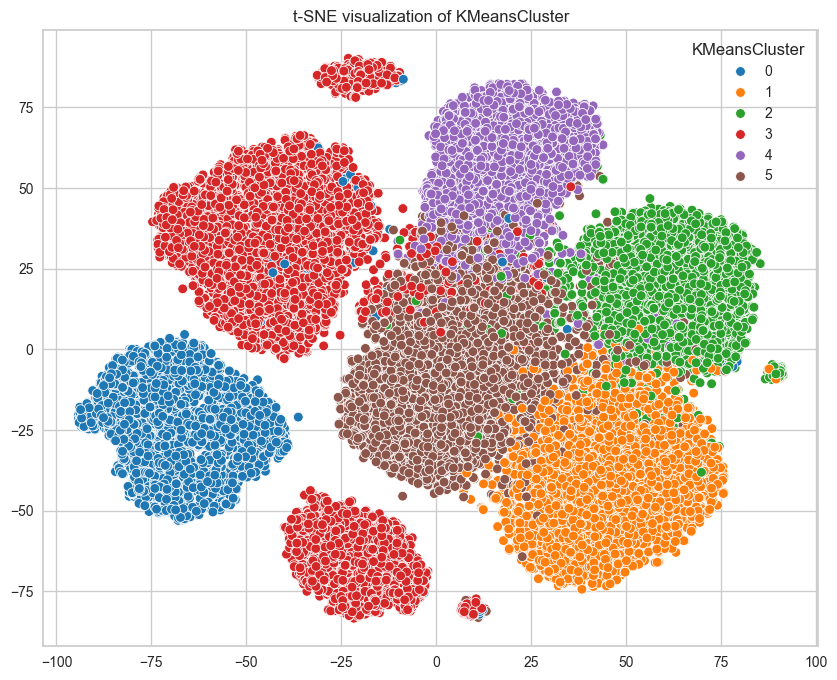

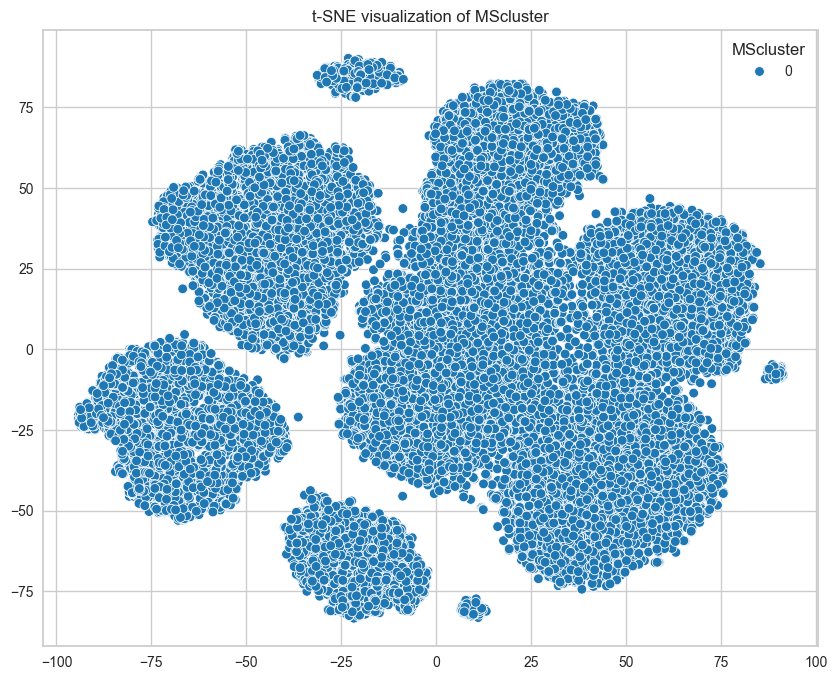

In [93]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

for label in universal_labels:
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=data_cluster[label], palette='tab10')
    plt.title(f't-SNE visualization of {label}')
    plt.show()

# Assosiation Rules

In [94]:
# Read basket dataset
df_basket = pd.read_csv('customer_basket.csv')

In [95]:
# Convert list_of_goods from string to actual list
df_basket['list_of_goods'] = df_basket['list_of_goods'].apply(lambda x: ast.literal_eval(x))

In [96]:
# Prepare transaction list
transactions = df_basket['list_of_goods'].tolist()

In [97]:
# Encode transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

In [98]:
# Apply Apriori algorithm
frequent_itemsets = apriori(df_trans, min_support=0.01, use_colnames=True)

In [99]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

In [100]:
# Sort by highest lift
rules = rules.sort_values(by='lift', ascending=False)

In [101]:
# Show top 10 rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


antecedents  \
1690                    (dessert wine, cider)   
1691                             (white wine)   
1943                  (pancakes, protein bar)   
1946                           (energy drink)   
1923                           (energy drink)   
1918                   (pancakes, energy bar)   
1928                           (energy drink)   
1925                (energy bar, protein bar)   
1935                           (energy drink)   
1930  (pancakes, gadget for tiktok streaming)   

                                  consequents  support  confidence      lift  
1690                             (white wine)  0.01633    0.809217  9.854080  
1691                    (dessert wine, cider)  0.01633    0.198855  9.854080  
1943                           (energy drink)  0.01890    0.835544  9.772442  
1946                  (pancakes, protein bar)  0.01890    0.221053  9.772442  
1923                   (pancakes, energy bar)  0.01250    0.146199  9.746589  
1918                           (energy drink)  0.01250    0.833333  9.746589  
1928                (energy bar, protein bar)  0.01007    0.117778  9.733701  
1925                           (energy drink)  0.01007    0.832231  9.733701  
1935  (pancakes, gadget for tiktok streaming)  0.01480    0.173099  9.670358  
1930                           (energy drink)  0.01480    0.826816  9.670358

In [102]:
# customer_id -> cluster
cluster_map_KMeans = data_cluster.set_index('customer_id')['KMeansCluster'].to_dict()
cluster_map_DBSCAN = data_cluster.set_index('customer_id')['DBSCAN_cluster'].to_dict()
cluster_map_Tandem = data_cluster.set_index('customer_id')['TandemKMeansCluster'].to_dict()
cluster_map_MS = data_cluster.set_index('customer_id')['MScluster'].to_dict()

In [103]:
# Adding cluster to df_basket
df_basket['KMeansCluster'] = df_basket['customer_id'].map(cluster_map_KMeans)
df_basket['DBSCAN_cluster'] = df_basket['customer_id'].map(cluster_map_DBSCAN)
df_basket['TandemKMeansCluster'] = df_basket['customer_id'].map(cluster_map_Tandem)
df_basket['MScluster'] = df_basket['customer_id'].map(cluster_map_Tandem)

In [104]:
# 2️⃣ Go through each cluster
unique_clusters_KMeans = df_basket['KMeansCluster'].dropna().unique()
unique_clusters_DBSCAN = df_basket['DBSCAN_cluster'].dropna().unique()
unique_clusters_Tandem = df_basket['TandemKMeansCluster'].dropna().unique()
unique_clusters_MS = df_basket['MScluster'].dropna().unique()

In [105]:
# 3️⃣ for each cluster in each clusterization make assosiations
for cluster in unique_clusters_KMeans:
    rules = assosiations_cl(df_basket,cluster,'KMeansCluster')
    display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10))


=== Association Rules for Cluster 4 ===


/Users/timkuz/Downloads/beaver_project/utils.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_basket['list_of_goods'] = cluster_basket['list_of_goods'].apply(clean_list_of_goods)


antecedents                    consequents   support  \
5087         (white wine, red wine)                  (beer, cider)  0.014414   
5086                  (beer, cider)         (white wine, red wine)  0.014414   
5239     (white wine, dessert wine)  (bluetooth headphones, cider)  0.013191   
5238  (bluetooth headphones, cider)     (white wine, dessert wine)  0.013191   
5314          (white wine, bramble)      (dessert wine, champagne)  0.011007   
5315      (dessert wine, champagne)          (white wine, bramble)  0.011007   
5130         (white wine, red wine)           (beer, dessert wine)  0.011095   
5127           (beer, dessert wine)         (white wine, red wine)  0.011095   
5006          (white wine, bramble)           (beer, dessert wine)  0.013541   
5003           (beer, dessert wine)          (white wine, bramble)  0.013541   

      confidence      lift  
5087    0.280612  4.329068  
5086    0.222372  4.329068  
5239    0.126678  4.227642  
5238    0.440233  4.227642  
5314    0.174757  4.202619  
5315    0.264706  4.202619  
5130    0.215986  4.148316  
5127    0.213087  4.148316  
5006    0.214979  4.128971  
5003    0.260067  4.128971


=== Association Rules for Cluster 3 ===


/Users/timkuz/Downloads/beaver_project/utils.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_basket['list_of_goods'] = cluster_basket['list_of_goods'].apply(clean_list_of_goods)


antecedents                 consequents   support  \
421                       (beer)          (salt, white wine)  0.014489   
420           (salt, white wine)                      (beer)  0.014489   
1251                (white wine)       (dessert wine, cider)  0.011540   
1250       (dessert wine, cider)                (white wine)  0.011540   
413         (beer, dessert wine)                (white wine)  0.014083   
416                 (white wine)        (beer, dessert wine)  0.014083   
1253                     (cider)  (white wine, dessert wine)  0.011540   
1248  (white wine, dessert wine)                     (cider)  0.011540   
407                (beer, cider)                (white wine)  0.016590   
410                 (white wine)               (beer, cider)  0.016590   

      confidence      lift  
421     0.178070  9.938199  
420     0.808642  9.938199  
1251    0.147711  9.584972  
1250    0.748804  9.584972  
413     0.684588  8.762982  
416     0.180274  8.762982  
1253    0.191672  8.607459  
1248    0.518212  8.607459  
407     0.661765  8.470838  
410     0.212364  8.470838


=== Association Rules for Cluster 5 ===


/Users/timkuz/Downloads/beaver_project/utils.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_basket['list_of_goods'] = cluster_basket['list_of_goods'].apply(clean_list_of_goods)


antecedents                  consequents   support  \
5959   (white wine, dessert wine)                (beer, cider)  0.010545   
5958                (beer, cider)   (white wine, dessert wine)  0.010545   
5956           (beer, white wine)        (dessert wine, cider)  0.010545   
5961        (dessert wine, cider)           (beer, white wine)  0.010545   
5960          (white wine, cider)         (beer, dessert wine)  0.010545   
5957         (beer, dessert wine)          (white wine, cider)  0.010545   
1624     (white wine, black beer)                      (cider)  0.010004   
1629                      (cider)     (white wine, black beer)  0.010004   
5963                 (white wine)  (beer, dessert wine, cider)  0.010545   
5954  (beer, dessert wine, cider)                 (white wine)  0.010545   

      confidence       lift  
5959    0.267123  11.277726  
5958    0.445205  11.277726  
5956    0.323383  11.033210  
5961    0.359779  11.033210  
5960    0.207668  10.847999  
5957    0.550847  10.847999  
1624    0.653710   8.843021  
1629    0.135333   8.843021  
5963    0.103723   8.678974  
5954    0.882353   8.678974


=== Association Rules for Cluster 0 ===


/Users/timkuz/Downloads/beaver_project/utils.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_basket['list_of_goods'] = cluster_basket['list_of_goods'].apply(clean_list_of_goods)


antecedents                         consequents  \
2872              (carrots, cauliflower)      (asparagus, tomatoes, cologne)   
2855      (asparagus, tomatoes, cologne)              (carrots, cauliflower)   
2869                (asparagus, cologne)    (carrots, tomatoes, cauliflower)   
2858    (carrots, tomatoes, cauliflower)                (asparagus, cologne)   
2860       (carrots, asparagus, cologne)             (tomatoes, cauliflower)   
2867             (tomatoes, cauliflower)       (carrots, asparagus, cologne)   
2859  (asparagus, tomatoes, cauliflower)                  (carrots, cologne)   
2868                  (carrots, cologne)  (asparagus, tomatoes, cauliflower)   
1846               (zucchini, asparagus)            (green grapes, tomatoes)   
1845            (green grapes, tomatoes)               (zucchini, asparagus)   

       support  confidence      lift  
2872  0.011241    0.094280  1.566721  
2855  0.011241    0.186800  1.566721  
2869  0.011241    0.157895  1.541293  
2858  0.011241    0.109729  1.541293  
2860  0.011241    0.249584  1.534769  
2867  0.011241    0.069124  1.534769  
2859  0.011241    0.093226  1.533912  
2868  0.011241    0.184957  1.533912  
1846  0.013264    0.112595  1.530014  
1845  0.013264    0.180244  1.530014


=== Association Rules for Cluster 1 ===


/Users/timkuz/Downloads/beaver_project/utils.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_basket['list_of_goods'] = cluster_basket['list_of_goods'].apply(clean_list_of_goods)


antecedents  \
3776       (minecraft, ratchet & clank, babies food)   
3791                             (pet food, muffins)   
3777            (ratchet & clank, pet food, muffins)   
3790                        (minecraft, babies food)   
3551      (pokemon shield, cooking oil, babies food)   
3558                     (ratchet & clank, pet food)   
3780                (muffins, pet food, babies food)   
3787                    (ratchet & clank, minecraft)   
3548  (pokemon shield, cooking oil, ratchet & clank)   
3561                         (pet food, babies food)   

                                         consequents   support  confidence  \
3776                             (pet food, muffins)  0.010271    0.046199   
3791       (minecraft, ratchet & clank, babies food)  0.010271    0.325758   
3777                        (minecraft, babies food)  0.010271    0.521212   
3790            (ratchet & clank, pet food, muffins)  0.010271    0.028830   
3551                     (ratchet & clank, pet food)  0.010988    0.254848   
3558      (pokemon shield, cooking oil, babies food)  0.010988    0.061786   
3780                    (ratchet & clank, minecraft)  0.010271    0.369892   
3787                (muffins, pet food, babies food)  0.010271    0.039750   
3548                         (pet food, babies food)  0.010988    0.353167   
3561  (pokemon shield, cooking oil, ratchet & clank)  0.010988    0.044487   

          lift  
3776  1.465253  
3791  1.465253  
3777  1.462993  
3790  1.462993  
3551  1.433069  
3558  1.433069  
3780  1.431527  
3787  1.431527  
3548  1.429916  
3561  1.429916


=== Association Rules for Cluster 2 ===


/Users/timkuz/Downloads/beaver_project/utils.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_basket['list_of_goods'] = cluster_basket['list_of_goods'].apply(clean_list_of_goods)


antecedents                consequents   support  \
31                      (cider)               (white wine)  0.014789   
30                 (white wine)                    (cider)  0.014789   
42                 (white wine)             (dessert wine)  0.011520   
43               (dessert wine)               (white wine)  0.011520   
14                       (beer)               (white wine)  0.010197   
15                 (white wine)                     (beer)  0.010197   
71                        (oil)                (meatballs)  0.010430   
70                  (meatballs)                      (oil)  0.010430   
1496  (cottage cheese, almonds)       (avocado, champagne)  0.010275   
1497       (avocado, champagne)  (cottage cheese, almonds)  0.010275   

      confidence      lift  
31      0.396660  9.231680  
30      0.344203  9.231680  
42      0.268116  7.810625  
43      0.335601  7.810625  
14      0.227826  5.302322  
15      0.237319  5.302322  
71      0.172903  2.601040  
70      0.156909  2.601040  
1496    0.345550  1.673936  
1497    0.049774  1.673936

In [106]:
for cluster in unique_clusters_Tandem:
    rules = assosiations_cl(df_basket,cluster,'TandemKMeansCluster')
    display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10))


=== Association Rules for Cluster 2 ===


/Users/timkuz/Downloads/beaver_project/utils.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_basket['list_of_goods'] = cluster_basket['list_of_goods'].apply(clean_list_of_goods)


antecedents                    consequents   support  \
4922                  (beer, cider)         (white wine, red wine)  0.016529   
4923         (white wine, red wine)                  (beer, cider)  0.016529   
4963           (beer, dessert wine)         (white wine, red wine)  0.012678   
4966         (white wine, red wine)           (beer, dessert wine)  0.012678   
5140          (white wine, bramble)      (dessert wine, champagne)  0.012357   
5141      (dessert wine, champagne)          (white wine, bramble)  0.012357   
4925              (red wine, cider)             (beer, white wine)  0.016529   
4920             (beer, white wine)              (red wine, cider)  0.016529   
5077     (white wine, dessert wine)  (bluetooth headphones, cider)  0.013961   
5076  (bluetooth headphones, cider)     (white wine, dessert wine)  0.013961   

      confidence      lift  
4922    0.226872  3.999305  
4923    0.291372  3.999305  
4963    0.219140  3.863003  
4966    0.223479  3.863003  
5140    0.172452  3.731379  
5141    0.267361  3.731379  
4925    0.373188  3.720838  
4920    0.164800  3.720838  
5077    0.120415  3.714690  
5076    0.430693  3.714690


=== Association Rules for Cluster 0 ===


/Users/timkuz/Downloads/beaver_project/utils.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_basket['list_of_goods'] = cluster_basket['list_of_goods'].apply(clean_list_of_goods)


antecedents                 consequents   support  \
467                       (beer)          (salt, white wine)  0.014043   
466           (salt, white wine)                      (beer)  0.014043   
1511                (white wine)       (dessert wine, cider)  0.013277   
1510       (dessert wine, cider)                (white wine)  0.013277   
444                 (white wine)           (beer, champagne)  0.010768   
441            (beer, champagne)                (white wine)  0.010768   
462                 (white wine)        (beer, dessert wine)  0.015158   
459         (beer, dessert wine)                (white wine)  0.015158   
1513                     (cider)  (white wine, dessert wine)  0.013277   
1508  (white wine, dessert wine)                     (cider)  0.013277   

      confidence      lift  
467     0.169756  9.627429  
466     0.796443  9.627429  
1511    0.156726  8.995111  
1510    0.762000  8.995111  
444     0.127108  8.346965  
441     0.707094  8.346965  
462     0.178939  8.268928  
459     0.700483  8.268928  
1513    0.206280  8.064891  
1508    0.519074  8.064891


=== Association Rules for Cluster 3 ===


/Users/timkuz/Downloads/beaver_project/utils.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_basket['list_of_goods'] = cluster_basket['list_of_goods'].apply(clean_list_of_goods)


antecedents  \
435                                   (cider)   
434                              (white wine)   
582                              (white wine)   
583                            (dessert wine)   
4544            (fresh tuna, frozen smoothie)   
4545              (cottage cheese, champagne)   
4418                  (fresh tuna, champagne)   
4419    (bluetooth headphones, fromage blanc)   
4504  (bluetooth headphones, frozen smoothie)   
4501                   (spaghetti, champagne)   

                                  consequents   support  confidence      lift  
435                              (white wine)  0.013964    0.406530  9.740015  
434                                   (cider)  0.013964    0.334563  9.740015  
582                            (dessert wine)  0.011171    0.267650  8.302267  
583                              (white wine)  0.011171    0.346521  8.302267  
4544              (cottage cheese, champagne)  0.012667    0.240602  4.484063  
4545            (fresh tuna, frozen smoothie)  0.012667    0.236066  4.484063  
4418    (bluetooth headphones, fromage blanc)  0.011897    0.091293  4.483197  
4419                  (fresh tuna, champagne)  0.011897    0.584233  4.483197  
4504                   (spaghetti, champagne)  0.014448    0.363787  4.430334  
4501  (bluetooth headphones, frozen smoothie)  0.014448    0.175951  4.430334


=== Association Rules for Cluster 1 ===


/Users/timkuz/Downloads/beaver_project/utils.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_basket['list_of_goods'] = cluster_basket['list_of_goods'].apply(clean_list_of_goods)


antecedents                         consequents  \
2994              (carrots, cauliflower)      (asparagus, tomatoes, cologne)   
2977      (asparagus, tomatoes, cologne)              (carrots, cauliflower)   
2991                (asparagus, cologne)    (carrots, tomatoes, cauliflower)   
2980    (carrots, tomatoes, cauliflower)                (asparagus, cologne)   
2981  (asparagus, tomatoes, cauliflower)                  (carrots, cologne)   
2990                  (carrots, cologne)  (asparagus, tomatoes, cauliflower)   
2982       (carrots, asparagus, cologne)             (tomatoes, cauliflower)   
2989             (tomatoes, cauliflower)       (carrots, asparagus, cologne)   
1926               (zucchini, asparagus)            (green grapes, tomatoes)   
1925            (green grapes, tomatoes)               (zucchini, asparagus)   

       support  confidence      lift  
2994  0.011223    0.094280  1.569304  
2977  0.011223    0.186800  1.569304  
2991  0.011223    0.157895  1.542705  
2980  0.011223    0.109649  1.542705  
2981  0.011223    0.093284  1.539294  
2990  0.011223    0.185185  1.539294  
2982  0.011223    0.249584  1.538718  
2989  0.011223    0.069188  1.538718  
1926  0.013243    0.112667  1.533512  
1925  0.013243    0.180244  1.533512

In [107]:
for cluster in unique_clusters_MS:
    rules = assosiations_cl(df_basket,cluster,'MScluster')
    display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10))


=== Association Rules for Cluster 2 ===


/Users/timkuz/Downloads/beaver_project/utils.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_basket['list_of_goods'] = cluster_basket['list_of_goods'].apply(clean_list_of_goods)


antecedents                    consequents   support  \
4922                  (beer, cider)         (white wine, red wine)  0.016529   
4923         (white wine, red wine)                  (beer, cider)  0.016529   
4963           (beer, dessert wine)         (white wine, red wine)  0.012678   
4966         (white wine, red wine)           (beer, dessert wine)  0.012678   
5140          (white wine, bramble)      (dessert wine, champagne)  0.012357   
5141      (dessert wine, champagne)          (white wine, bramble)  0.012357   
4925              (red wine, cider)             (beer, white wine)  0.016529   
4920             (beer, white wine)              (red wine, cider)  0.016529   
5077     (white wine, dessert wine)  (bluetooth headphones, cider)  0.013961   
5076  (bluetooth headphones, cider)     (white wine, dessert wine)  0.013961   

      confidence      lift  
4922    0.226872  3.999305  
4923    0.291372  3.999305  
4963    0.219140  3.863003  
4966    0.223479  3.863003  
5140    0.172452  3.731379  
5141    0.267361  3.731379  
4925    0.373188  3.720838  
4920    0.164800  3.720838  
5077    0.120415  3.714690  
5076    0.430693  3.714690


=== Association Rules for Cluster 0 ===


/Users/timkuz/Downloads/beaver_project/utils.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_basket['list_of_goods'] = cluster_basket['list_of_goods'].apply(clean_list_of_goods)


antecedents                 consequents   support  \
467                       (beer)          (salt, white wine)  0.014043   
466           (salt, white wine)                      (beer)  0.014043   
1511                (white wine)       (dessert wine, cider)  0.013277   
1510       (dessert wine, cider)                (white wine)  0.013277   
444                 (white wine)           (beer, champagne)  0.010768   
441            (beer, champagne)                (white wine)  0.010768   
462                 (white wine)        (beer, dessert wine)  0.015158   
459         (beer, dessert wine)                (white wine)  0.015158   
1513                     (cider)  (white wine, dessert wine)  0.013277   
1508  (white wine, dessert wine)                     (cider)  0.013277   

      confidence      lift  
467     0.169756  9.627429  
466     0.796443  9.627429  
1511    0.156726  8.995111  
1510    0.762000  8.995111  
444     0.127108  8.346965  
441     0.707094  8.346965  
462     0.178939  8.268928  
459     0.700483  8.268928  
1513    0.206280  8.064891  
1508    0.519074  8.064891


=== Association Rules for Cluster 3 ===


/Users/timkuz/Downloads/beaver_project/utils.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_basket['list_of_goods'] = cluster_basket['list_of_goods'].apply(clean_list_of_goods)


antecedents  \
435                                   (cider)   
434                              (white wine)   
582                              (white wine)   
583                            (dessert wine)   
4544            (fresh tuna, frozen smoothie)   
4545              (cottage cheese, champagne)   
4418                  (fresh tuna, champagne)   
4419    (bluetooth headphones, fromage blanc)   
4504  (bluetooth headphones, frozen smoothie)   
4501                   (spaghetti, champagne)   

                                  consequents   support  confidence      lift  
435                              (white wine)  0.013964    0.406530  9.740015  
434                                   (cider)  0.013964    0.334563  9.740015  
582                            (dessert wine)  0.011171    0.267650  8.302267  
583                              (white wine)  0.011171    0.346521  8.302267  
4544              (cottage cheese, champagne)  0.012667    0.240602  4.484063  
4545            (fresh tuna, frozen smoothie)  0.012667    0.236066  4.484063  
4418    (bluetooth headphones, fromage blanc)  0.011897    0.091293  4.483197  
4419                  (fresh tuna, champagne)  0.011897    0.584233  4.483197  
4504                   (spaghetti, champagne)  0.014448    0.363787  4.430334  
4501  (bluetooth headphones, frozen smoothie)  0.014448    0.175951  4.430334


=== Association Rules for Cluster 1 ===


/Users/timkuz/Downloads/beaver_project/utils.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_basket['list_of_goods'] = cluster_basket['list_of_goods'].apply(clean_list_of_goods)


antecedents                         consequents  \
2994              (carrots, cauliflower)      (asparagus, tomatoes, cologne)   
2977      (asparagus, tomatoes, cologne)              (carrots, cauliflower)   
2991                (asparagus, cologne)    (carrots, tomatoes, cauliflower)   
2980    (carrots, tomatoes, cauliflower)                (asparagus, cologne)   
2981  (asparagus, tomatoes, cauliflower)                  (carrots, cologne)   
2990                  (carrots, cologne)  (asparagus, tomatoes, cauliflower)   
2982       (carrots, asparagus, cologne)             (tomatoes, cauliflower)   
2989             (tomatoes, cauliflower)       (carrots, asparagus, cologne)   
1926               (zucchini, asparagus)            (green grapes, tomatoes)   
1925            (green grapes, tomatoes)               (zucchini, asparagus)   

       support  confidence      lift  
2994  0.011223    0.094280  1.569304  
2977  0.011223    0.186800  1.569304  
2991  0.011223    0.157895  1.542705  
2980  0.011223    0.109649  1.542705  
2981  0.011223    0.093284  1.539294  
2990  0.011223    0.185185  1.539294  
2982  0.011223    0.249584  1.538718  
2989  0.011223    0.069188  1.538718  
1926  0.013243    0.112667  1.533512  
1925  0.013243    0.180244  1.533512

In [ ]:
for cluster in unique_clusters_DBSCAN:
    rules = assosiations_cl(df_basket,cluster,'DBSCAN_cluster')
    display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10))

# Final

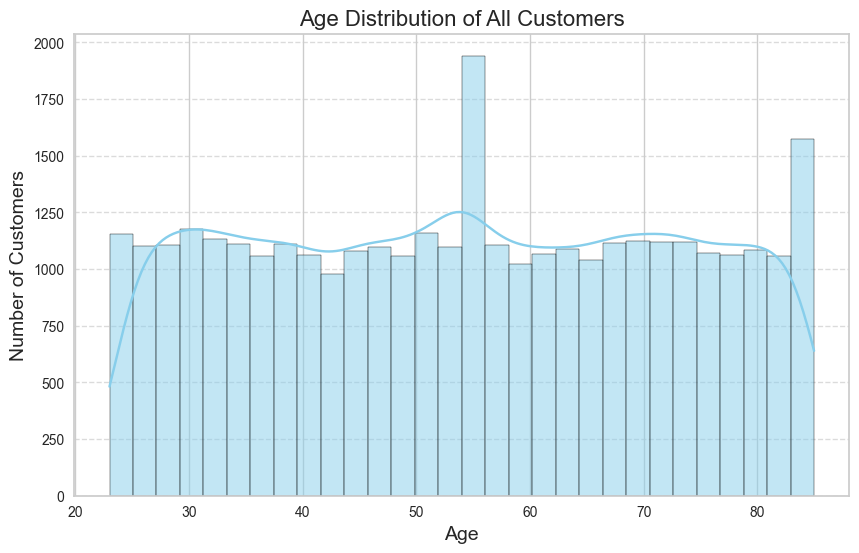

In [116]:
plt.figure(figsize=(10,6))
sns.histplot(data_cluster['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of All Customers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [118]:
cluster_profiles = data_cluster.groupby('KMeansCluster')[features_selected].mean()

In [119]:
for cluster in sorted(data_cluster['KMeansCluster'].unique()):
    cluster_mode_age = data_cluster[data_cluster['KMeansCluster'] == cluster]['age'].mode()[0]
    print(f"Cluster {cluster}: Most common age (mode) = {cluster_mode_age} years old")


Cluster 0: Most common age (mode) = 54.0 years old
Cluster 1: Most common age (mode) = 54.0 years old
Cluster 2: Most common age (mode) = 54.0 years old
Cluster 3: Most common age (mode) = 29.0 years old
Cluster 4: Most common age (mode) = 54.0 years old
Cluster 5: Most common age (mode) = 54.0 years old


In [109]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

display(cluster_profiles)

age  underage_home  lifetime_total_distinct_products  \
KMeansCluster                                                          
0             56.12           1.26                             80.65   
1             56.91           3.90                            304.44   
2             56.41           1.42                            156.58   
3             48.18           1.73                             56.12   
4             56.36           0.52                            131.21   
5             56.89           1.80                            244.18   

               percentage_of_products_bought_promotion  distance_center  \
KMeansCluster                                                             
0                                                 0.09             0.03   
1                                                 0.20             0.03   
2                                                 0.10             0.04   
3                                                 0.62             0.03   
4                                                 0.31             0.04   
5                                                 0.40             0.03   

               lifetime_spend_groceries  lifetime_spend_electronics  \
KMeansCluster                                                         
0                              10605.61                     1977.18   
1                              19776.26                     4975.02   
2                              53402.37                     4972.64   
3                              10623.69                      752.55   
4                              23482.67                    10933.36   
5                              30601.72                     3320.13   

               lifetime_spend_vegetables  lifetime_spend_nonalcohol_drinks  \
KMeansCluster                                                                
0                                1973.48                            394.89   
1                                 782.12                            794.75   
2                                1079.69                            502.77   
3                                 353.44                            182.27   
4                                 247.75                            500.28   
5                                 331.98                            662.78   

               lifetime_spend_alcohol_drinks  lifetime_spend_meat  \
KMeansCluster                                                       
0                                     393.38                63.86   
1                                    1492.51              1513.36   
2                                    1484.14              1398.39   
3                                     359.56               691.35   
4                                     940.52               899.15   
5                                     670.78               998.10   

               lifetime_spend_fish  lifetime_spend_hygiene  \
KMeansCluster                                                
0                            79.93                  703.67   
1                          1249.99                  877.17   
2                          1646.45                  835.59   
3                           353.07                  403.01   
4                           832.05                  322.00   
5                           893.75                 1186.44   

               lifetime_spend_videogames  lifetime_spend_petfood  
KMeansCluster                                                     
0                                 201.66                  245.58  
1                                 399.09                  354.79  
2                                 582.63                  395.06  
3                                 179.59                  284.47  
4                                1042.75                  298.25  
5                                 332.05                  343.96

In [110]:
cluster_profiles = data_cluster.groupby('DBSCAN_cluster')[features_selected].mean()

In [120]:
for cluster in sorted(data_cluster['DBSCAN_cluster'].unique()):
    cluster_mode_age = data_cluster[data_cluster['DBSCAN_cluster'] == cluster]['age'].mode()[0]
    print(f"Cluster {cluster}: Most common age (mode) = {cluster_mode_age} years old")

Cluster -1: Most common age (mode) = 54.0 years old
Cluster 0: Most common age (mode) = 54.0 years old
Cluster 1: Most common age (mode) = 56.0 years old
Cluster 2: Most common age (mode) = 81.0 years old
Cluster 3: Most common age (mode) = 65.0 years old
Cluster 4: Most common age (mode) = 77.0 years old


In [111]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

display(cluster_profiles)

age  underage_home  lifetime_total_distinct_products  \
DBSCAN_cluster                                                          
-1             55.24           1.43                            224.47   
 0             54.15           1.92                            147.92   
 1             69.40           0.40                            319.20   
 2             79.00           0.40                            228.20   
 3             68.50           1.00                            154.00   
 4             82.25           0.75                            149.50   

                percentage_of_products_bought_promotion  distance_center  \
DBSCAN_cluster                                                             
-1                                                 0.32             0.04   
 0                                                 0.34             0.03   
 1                                                 0.56             0.04   
 2                                                 1.09             0.05   
 3                                                 0.39             0.02   
 4                                                 0.63             0.02   

                lifetime_spend_groceries  lifetime_spend_electronics  \
DBSCAN_cluster                                                         
-1                              35857.54                     7265.88   
 0                              21137.84                     3368.23   
 1                              13874.40                    14077.40   
 2                              24891.20                     9285.60   
 3                              61539.00                     2966.00   
 4                              15132.50                     9147.75   

                lifetime_spend_vegetables  lifetime_spend_nonalcohol_drinks  \
DBSCAN_cluster                                                                
-1                                 756.51                            539.30   
 0                                 711.50                            470.69   
 1                                 411.40                            172.00   
 2                                 405.80                            205.80   
 3                                 565.00                            150.00   
 4                                 211.75                            207.50   

                lifetime_spend_alcohol_drinks  lifetime_spend_meat  \
DBSCAN_cluster                                                       
-1                                    1008.59              1169.90   
 0                                     797.85               883.49   
 1                                     349.40               893.20   
 2                                     583.80               958.80   
 3                                     497.50              1045.50   
 4                                     314.00              1058.50   

                lifetime_spend_fish  lifetime_spend_hygiene  \
DBSCAN_cluster                                                
-1                          1132.03                  792.36   
 0                           743.05                  700.80   
 1                          1252.60                 1093.40   
 2                           552.40                  761.40   
 3                           637.00                  126.00   
 4                           164.25                  826.25   

                lifetime_spend_videogames  lifetime_spend_petfood  
DBSCAN_cluster                                                     
-1                                 555.00                  341.07  
 0                                 379.29                  314.79  
 1                                 532.80                  166.80  
 2                                 557.80                  164.20  
 3                                 713.50                  481.00  
 4                                 612.25                  294.00

In [112]:
cluster_profiles = data_cluster.groupby('TandemKMeansCluster')[features_selected].mean()

In [121]:
for cluster in sorted(data_cluster['TandemKMeansCluster'].unique()):
    cluster_mode_age = data_cluster[data_cluster['TandemKMeansCluster'] == cluster]['age'].mode()[0]
    print(f"Cluster {cluster}: Most common age (mode) = {cluster_mode_age} years old")

Cluster 0: Most common age (mode) = 29.0 years old
Cluster 1: Most common age (mode) = 54.0 years old
Cluster 2: Most common age (mode) = 54.0 years old
Cluster 3: Most common age (mode) = 54.0 years old


In [113]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

display(cluster_profiles)

age  underage_home  lifetime_total_distinct_products  \
TandemKMeansCluster                                                          
0                   48.64           1.71                             62.47   
1                   56.07           1.26                             80.69   
2                   56.49           0.53                            137.42   
3                   56.75           2.51                            244.66   

                     percentage_of_products_bought_promotion  distance_center  \
TandemKMeansCluster                                                             
0                                                       0.62             0.03   
1                                                       0.09             0.03   
2                                                       0.32             0.04   
3                                                       0.24             0.04   

                     lifetime_spend_groceries  lifetime_spend_electronics  \
TandemKMeansCluster                                                         
0                                    11195.35                      844.23   
1                                    10652.11                     1982.08   
2                                    24890.95                    10574.38   
3                                    33230.62                     4341.62   

                     lifetime_spend_vegetables  \
TandemKMeansCluster                              
0                                       354.69   
1                                      1976.00   
2                                       272.65   
3                                       703.59   

                     lifetime_spend_nonalcohol_drinks  \
TandemKMeansCluster                                     
0                                              198.24   
1                                              395.01   
2                                              492.99   
3                                              677.75   

                     lifetime_spend_alcohol_drinks  lifetime_spend_meat  \
TandemKMeansCluster                                                       
0                                           368.48               701.97   
1                                           394.79                64.69   
2                                           922.06               903.81   
3                                          1208.28              1306.54   

                     lifetime_spend_fish  lifetime_spend_hygiene  \
TandemKMeansCluster                                                
0                                 372.25                  425.28   
1                                  81.41                  703.71   
2                                 849.47                  350.53   
3                                1242.35                  998.37   

                     lifetime_spend_videogames  lifetime_spend_petfood  
TandemKMeansCluster                                                     
0                                       186.82                  286.31  
1                                       202.54                  245.87  
2                                      1008.17                  300.33  
3                                       420.90                  363.88

In [114]:
cluster_profiles = data_cluster.groupby('MScluster')[features_selected].mean()

In [122]:
for cluster in sorted(data_cluster['MScluster'].unique()):
    cluster_mode_age = data_cluster[data_cluster['MScluster'] == cluster]['age'].mode()[0]
    print(f"Cluster {cluster}: Most common age (mode) = {cluster_mode_age} years old")

Cluster 0: Most common age (mode) = 54.0 years old


In [115]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

display(cluster_profiles)

age  underage_home  lifetime_total_distinct_products  \
MScluster                                                          
0         54.29           1.86                            156.69   

           percentage_of_products_bought_promotion  distance_center  \
MScluster                                                             
0                                             0.34             0.03   

           lifetime_spend_groceries  lifetime_spend_electronics  \
MScluster                                                         
0                          22818.40                     3816.02   

           lifetime_spend_vegetables  lifetime_spend_nonalcohol_drinks  \
MScluster                                                                
0                             716.48                            478.38   

           lifetime_spend_alcohol_drinks  lifetime_spend_meat  \
MScluster                                                       
0                                 821.72               916.21   

           lifetime_spend_fish  lifetime_spend_hygiene  \
MScluster                                                
0                       787.40                  711.30   

           lifetime_spend_videogames  lifetime_spend_petfood  
MScluster                                                     
0                             399.43                  317.76

In [123]:

# Save final CSV
final_submission = data_cluster[["customer_id",'TandemKMeansCluster', 'KMeansCluster', 'MScluster', 'DBSCAN_cluster']]
final_submission.to_csv("sub.csv", index=False)
print("sub.csv saved")


sub.csv saved
